# Evalutation

In [70]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Load pickle file with results
with open('tuned-results.pkl', 'rb') as f:
    results = pickle.load(f)


plots = {
    'Initial': {},
    'Extra': {}
}

target_map = {
                'Insufficient_Weight': 0,
                'Normal_Weight': 1,
                'Overweight_Level_I': 2,
                'Overweight_Level_II': 3,
                'Obesity_Type_I': 4,
                'Obesity_Type_II': 5,
                'Obesity_Type_III': 6
            }
        
reversed_target_map = {v: k for k, v in target_map.items()}

# Print the results
for dataset, models in results.items():
    print(f"Dataset: {dataset}")
    approach = dataset.split('_')[0]
    dataset_name = "_".join(dataset.split('_')[1:])
    X_test = pd.read_csv(f"./datasets/preprocessed/{approach}/{dataset_name}/X_test.csv")
    y_test = pd.read_csv(f"./datasets/preprocessed/{approach}/{dataset_name}/y_test.csv")

    if approach not in plots:
        plots[approach] = {}

    for model_name, model_results in models.items():
        print(f"  Model: {model_name}")
        y_pred = model_results['fitted_model'].predict(X_test)
        
        if model_name not in plots[approach]:
            plots[approach][model_name] = {}

        if dataset_name not in plots[approach][model_name]:
            plots[approach][model_name][dataset_name] = {}

        

        plots[approach][model_name][dataset_name]['f1'] = model_results['test_f1']

        # Convert predictions from integers to string labels
        y_pred_labels = np.array([reversed_target_map[label] for label in y_pred])
        
        # Convert y_test to string labels too
        y_test_labels = np.array([reversed_target_map[int(label)] for label in y_test.values.flatten()])
        
        # Create a DataFrame for the confusion matrix with proper labels
        cm_array = confusion_matrix(y_test_labels, y_pred_labels, labels=list(reversed_target_map.values()))
        
        
        # Store the confusion matrix in the dictionary
        plots[approach][model_name][dataset_name]['cm'] = cm_array
        

        # Feature importance
        if hasattr(model_results['fitted_model'], 'feature_importances_'):
                plots[approach][model_name][dataset_name]['fi'] = pd.DataFrame({
                    'Feature': X_test.columns,
                    'Importance': model_results['fitted_model'].feature_importances_
                }).sort_values(by='Importance', ascending=False)
        elif hasattr(model_results['fitted_model'], 'coef_'):
            plots[approach][model_name][dataset_name]['fi'] = pd.DataFrame({
                'Feature': X_test.columns,
                'Importance': np.abs(model_results['fitted_model'].coef_[0])
            }).sort_values(by='Importance', ascending=False)
        else:
            plots[approach][model_name][dataset_name]['fi'] = None


Dataset: Initial_real_data
  Model: RandomForest
  Model: GradientBoosting
  Model: XGBoost
  Model: $k$NN
  Model: LGBM
  Model: Decision Tree
  Model: MLPClassifier
  Model: Baseline
Dataset: Initial_synth_data
  Model: RandomForest
  Model: GradientBoosting
  Model: XGBoost
  Model: $k$NN
  Model: LGBM
  Model: Decision Tree
  Model: MLPClassifier
  Model: Baseline
Dataset: Extra_real_data
  Model: RandomForest
  Model: GradientBoosting
  Model: XGBoost
  Model: $k$NN
  Model: LGBM
  Model: Decision Tree
  Model: MLPClassifier
  Model: Baseline
Dataset: Extra_real_pseudoreal_data
  Model: RandomForest
  Model: GradientBoosting
  Model: XGBoost
  Model: $k$NN
  Model: LGBM
  Model: Decision Tree
  Model: MLPClassifier
  Model: Baseline
Dataset: Extra_real_pseudoreal_synth_data
  Model: RandomForest
  Model: GradientBoosting
  Model: XGBoost
  Model: $k$NN
  Model: LGBM
  Model: Decision Tree
  Model: MLPClassifier
  Model: Baseline


Initial - RandomForest - real_data
Initial - RandomForest - synth_data


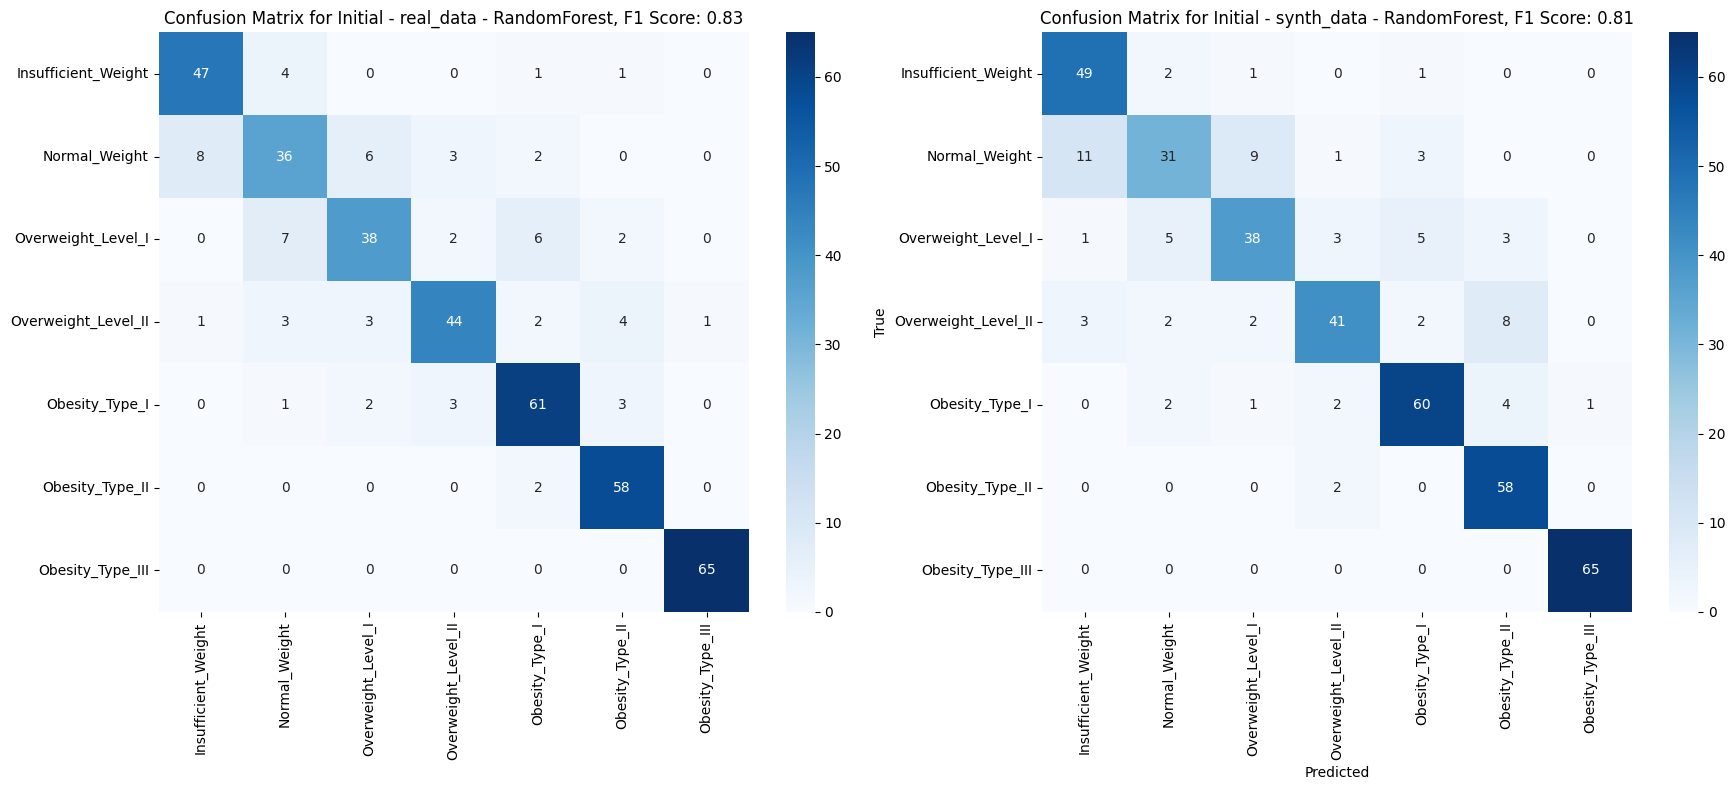

Initial - GradientBoosting - real_data
Initial - GradientBoosting - synth_data


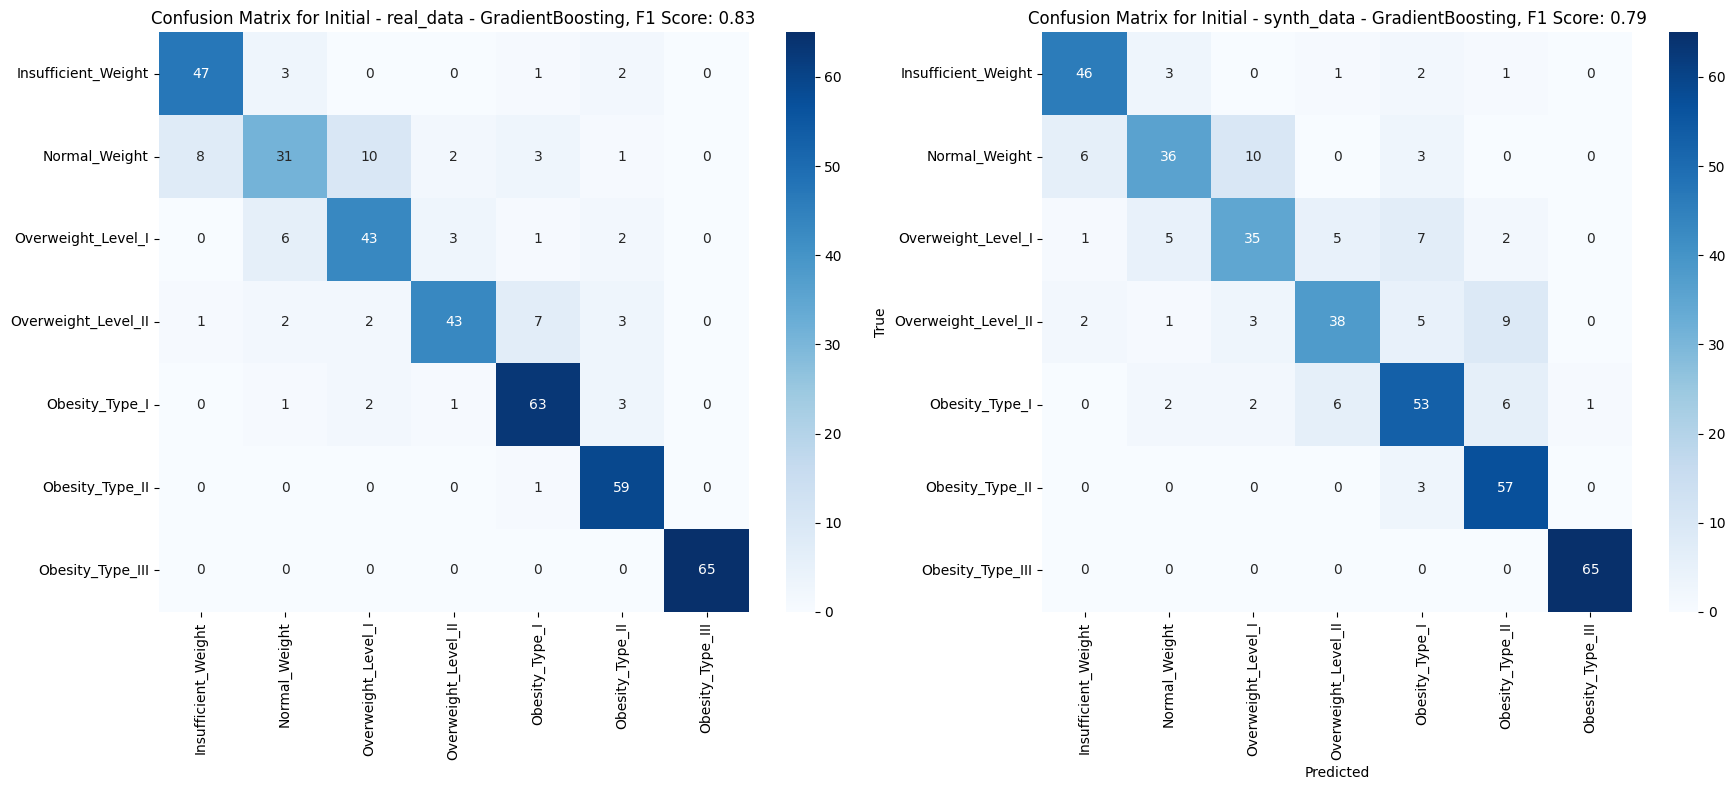

Initial - XGBoost - real_data
Initial - XGBoost - synth_data


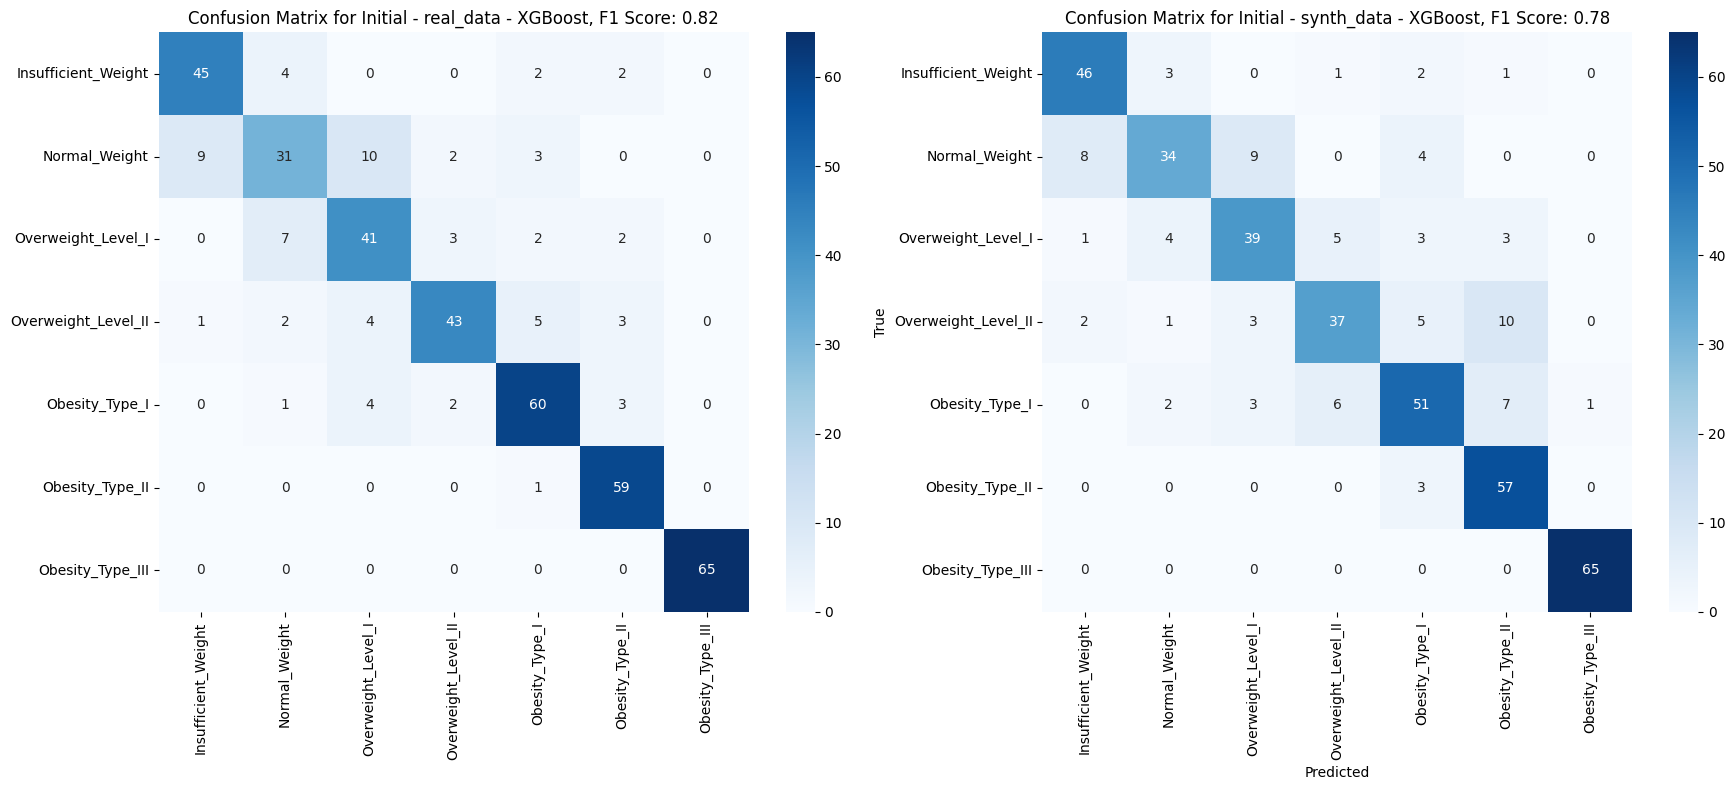

Initial - $k$NN - real_data
Initial - $k$NN - synth_data


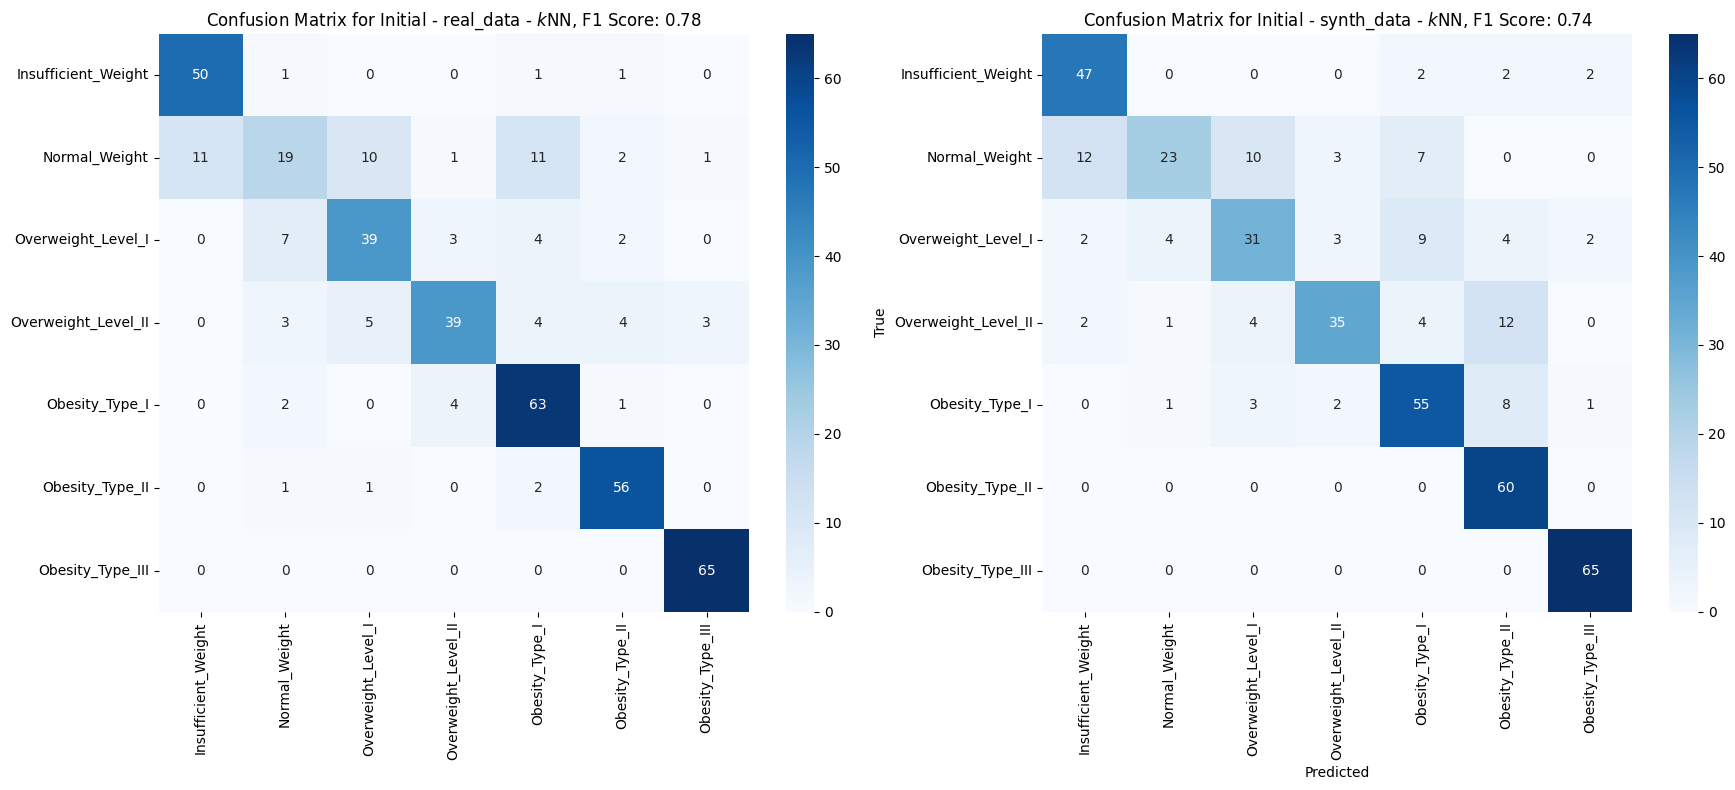

Initial - LGBM - real_data
Initial - LGBM - synth_data


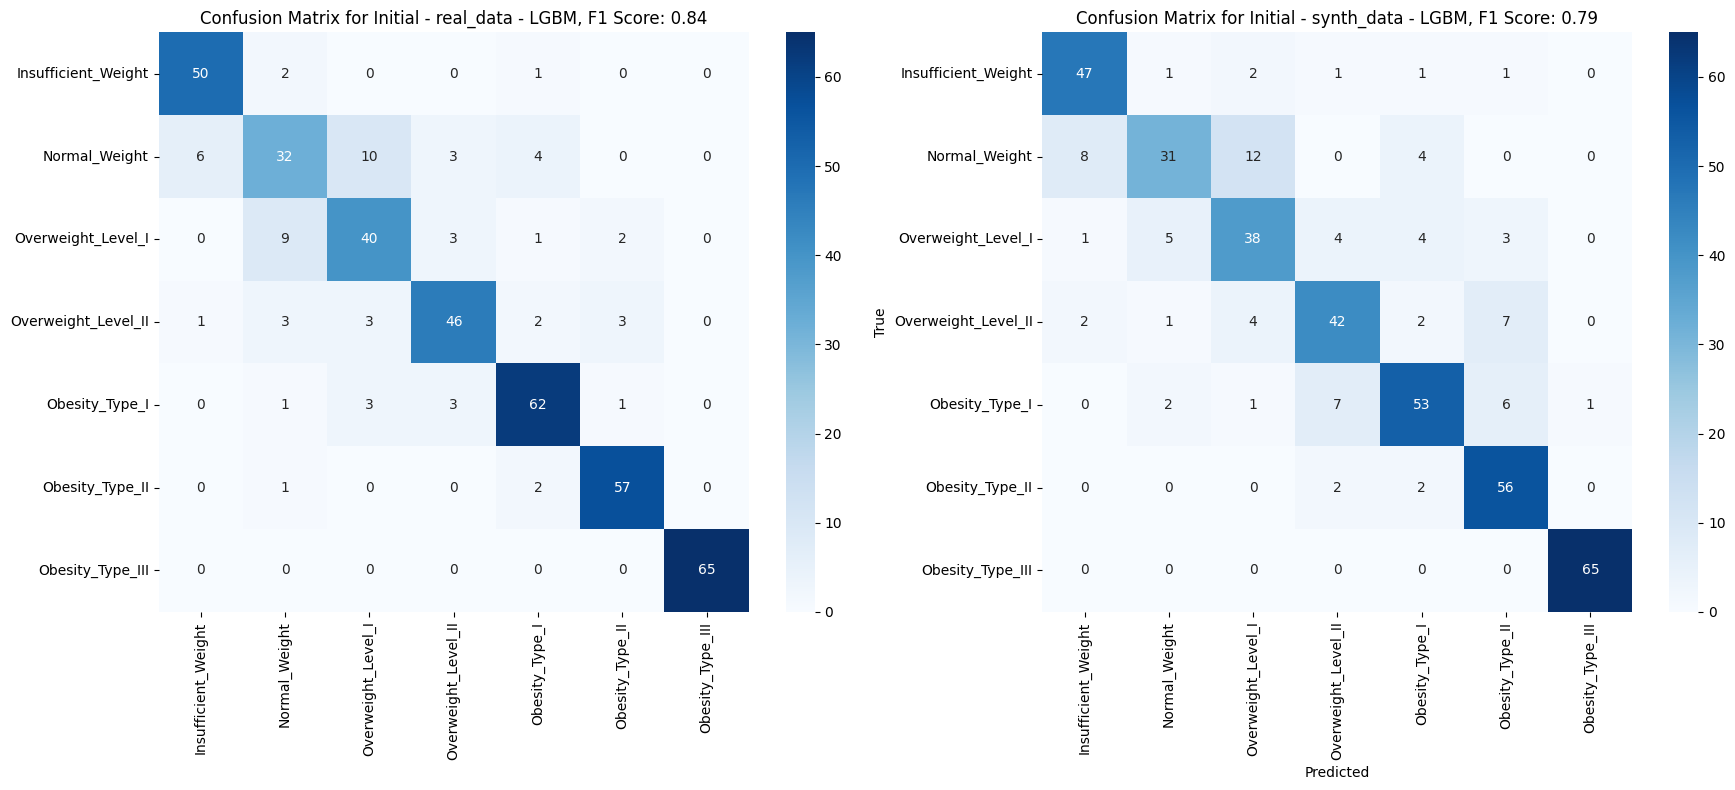

Initial - Decision Tree - real_data
Initial - Decision Tree - synth_data


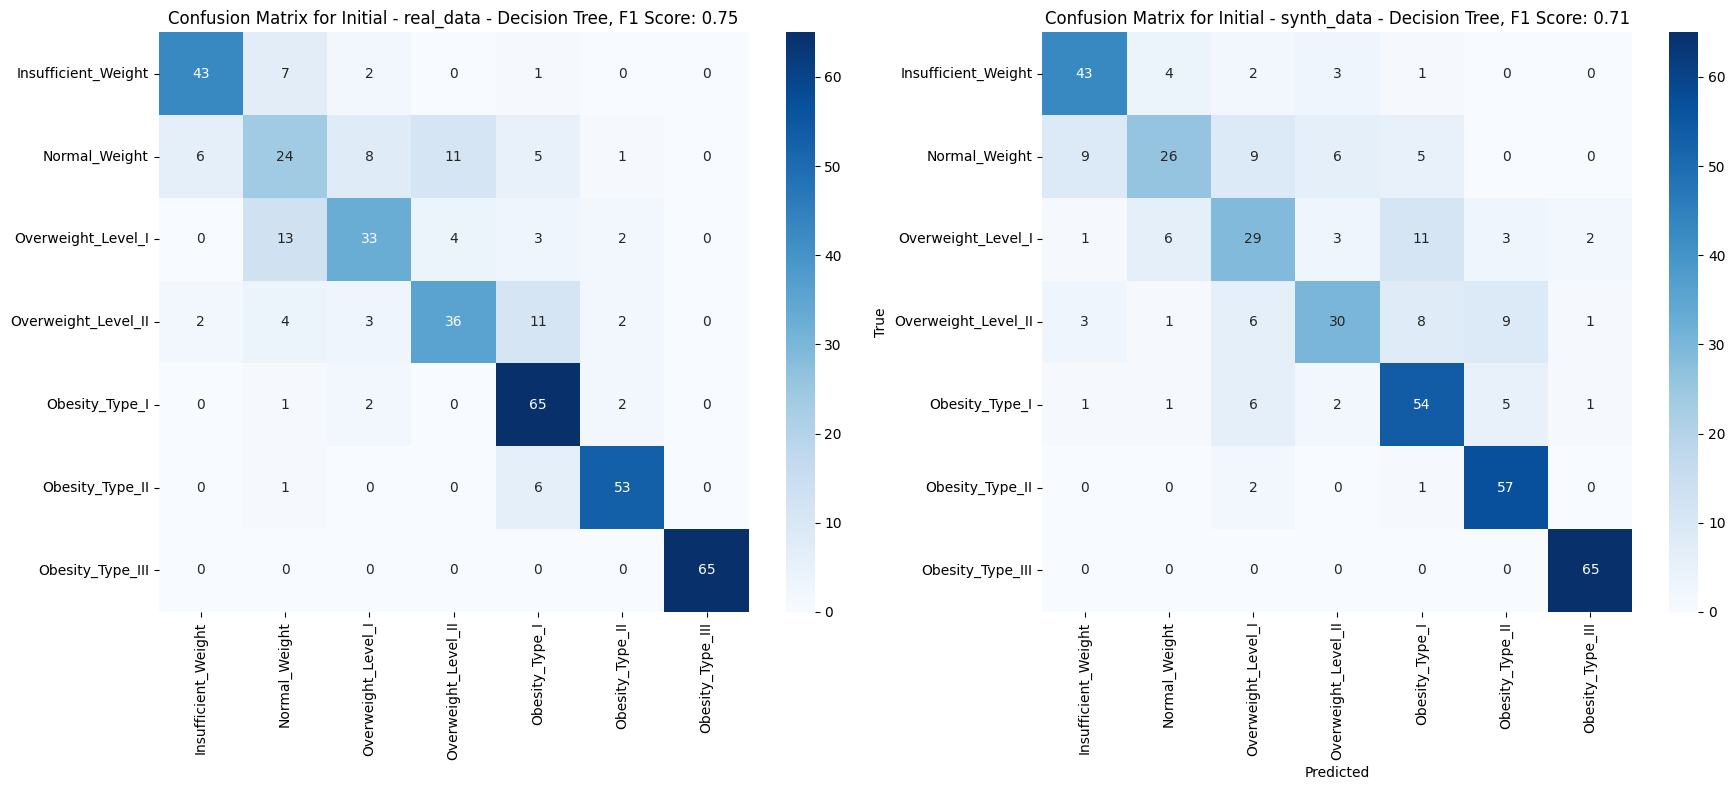

Initial - MLPClassifier - real_data
Initial - MLPClassifier - synth_data


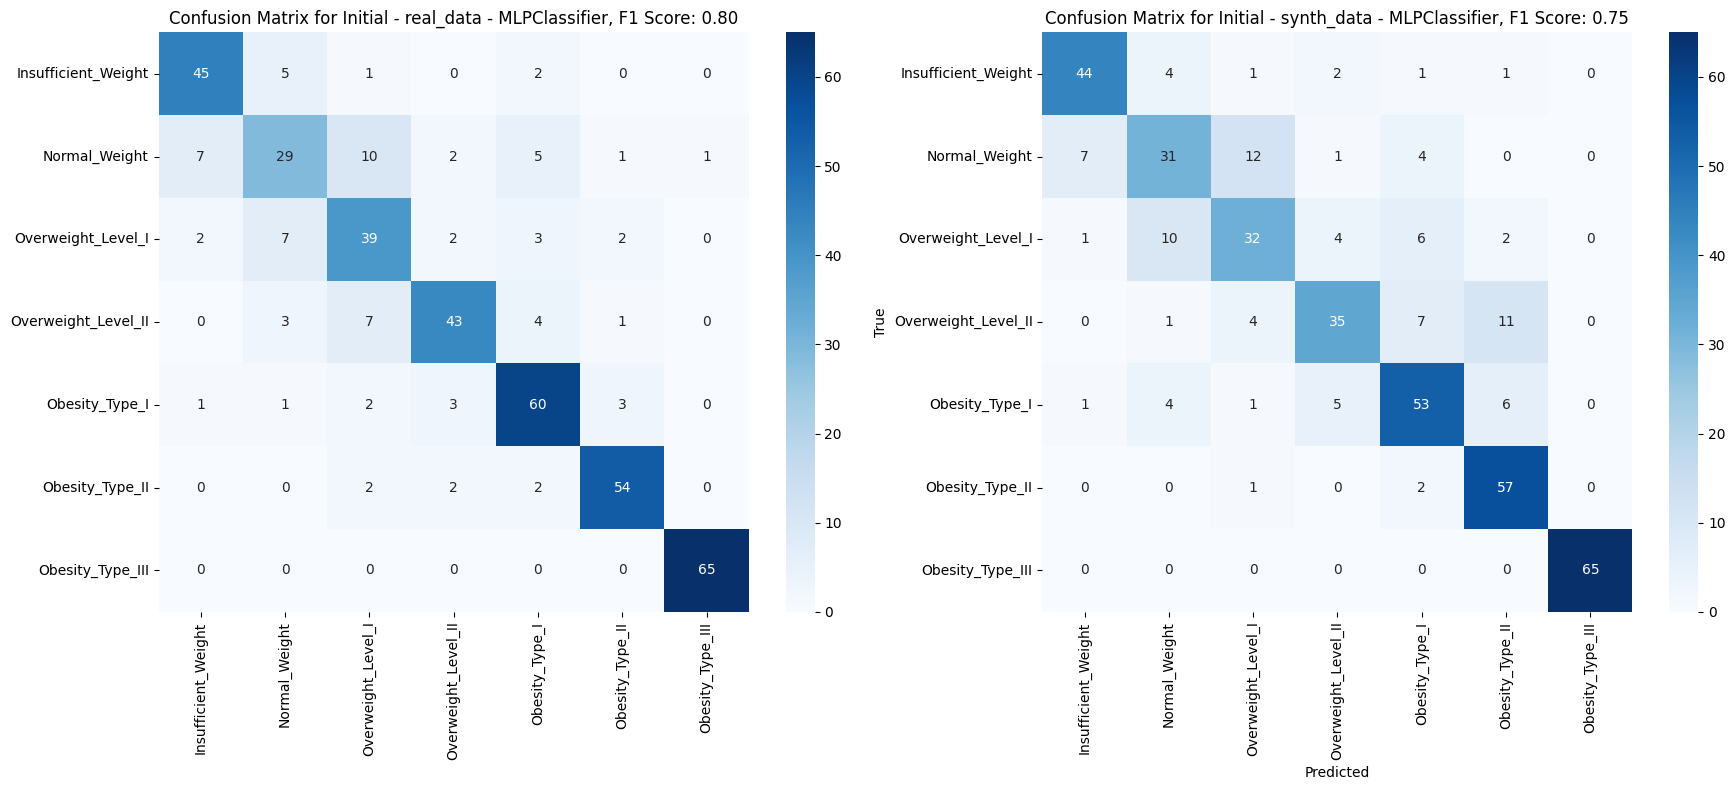

Initial - Baseline - real_data
Initial - Baseline - synth_data


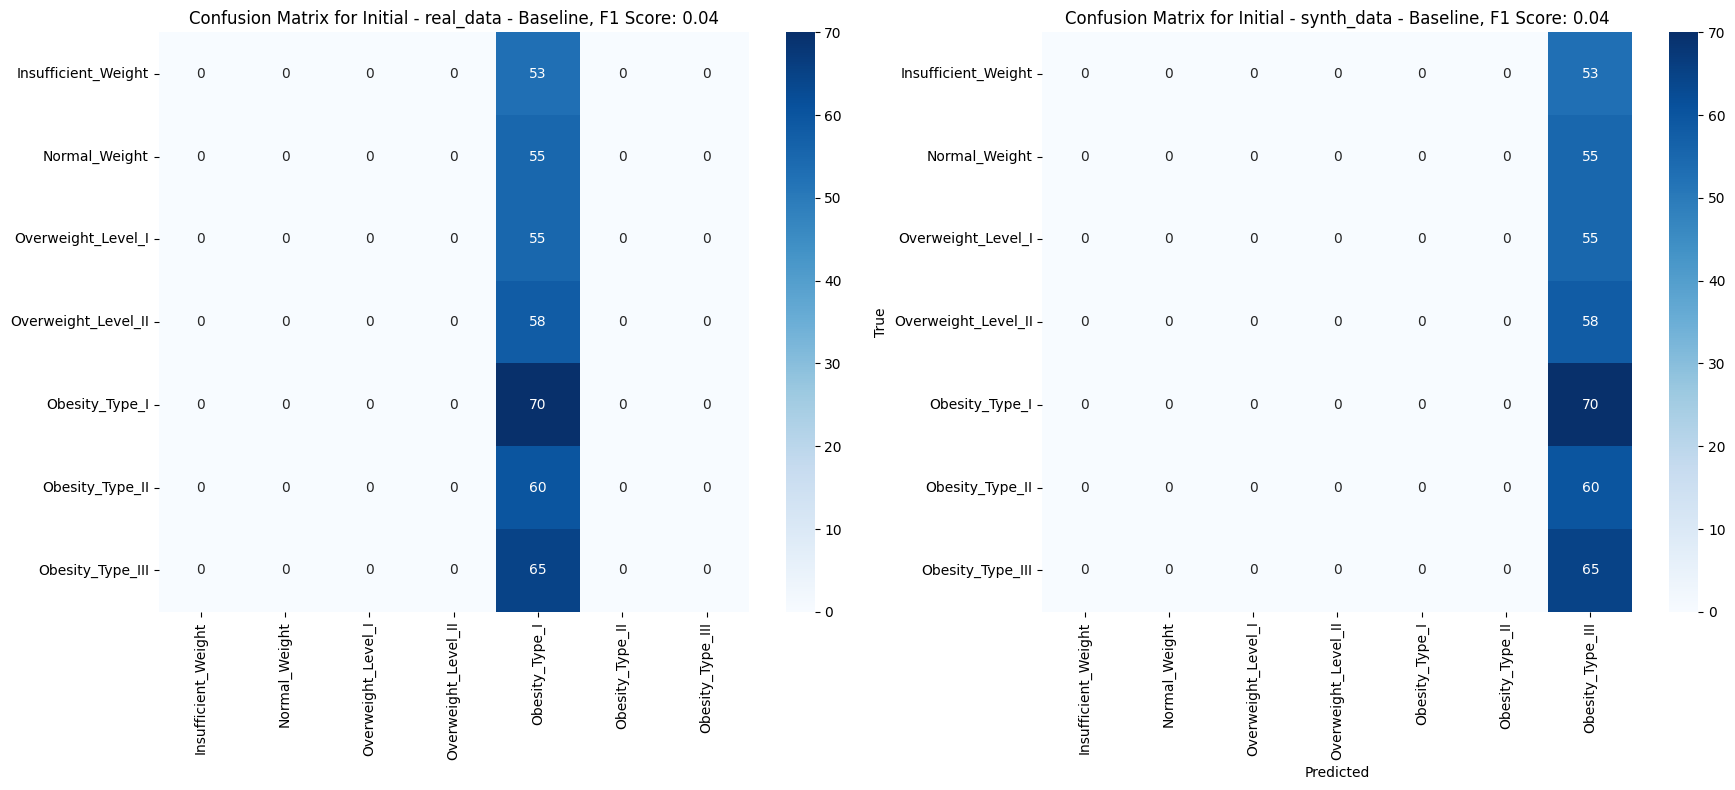

Extra - RandomForest - real_data
Extra - RandomForest - real_pseudoreal_data
Extra - RandomForest - real_pseudoreal_synth_data


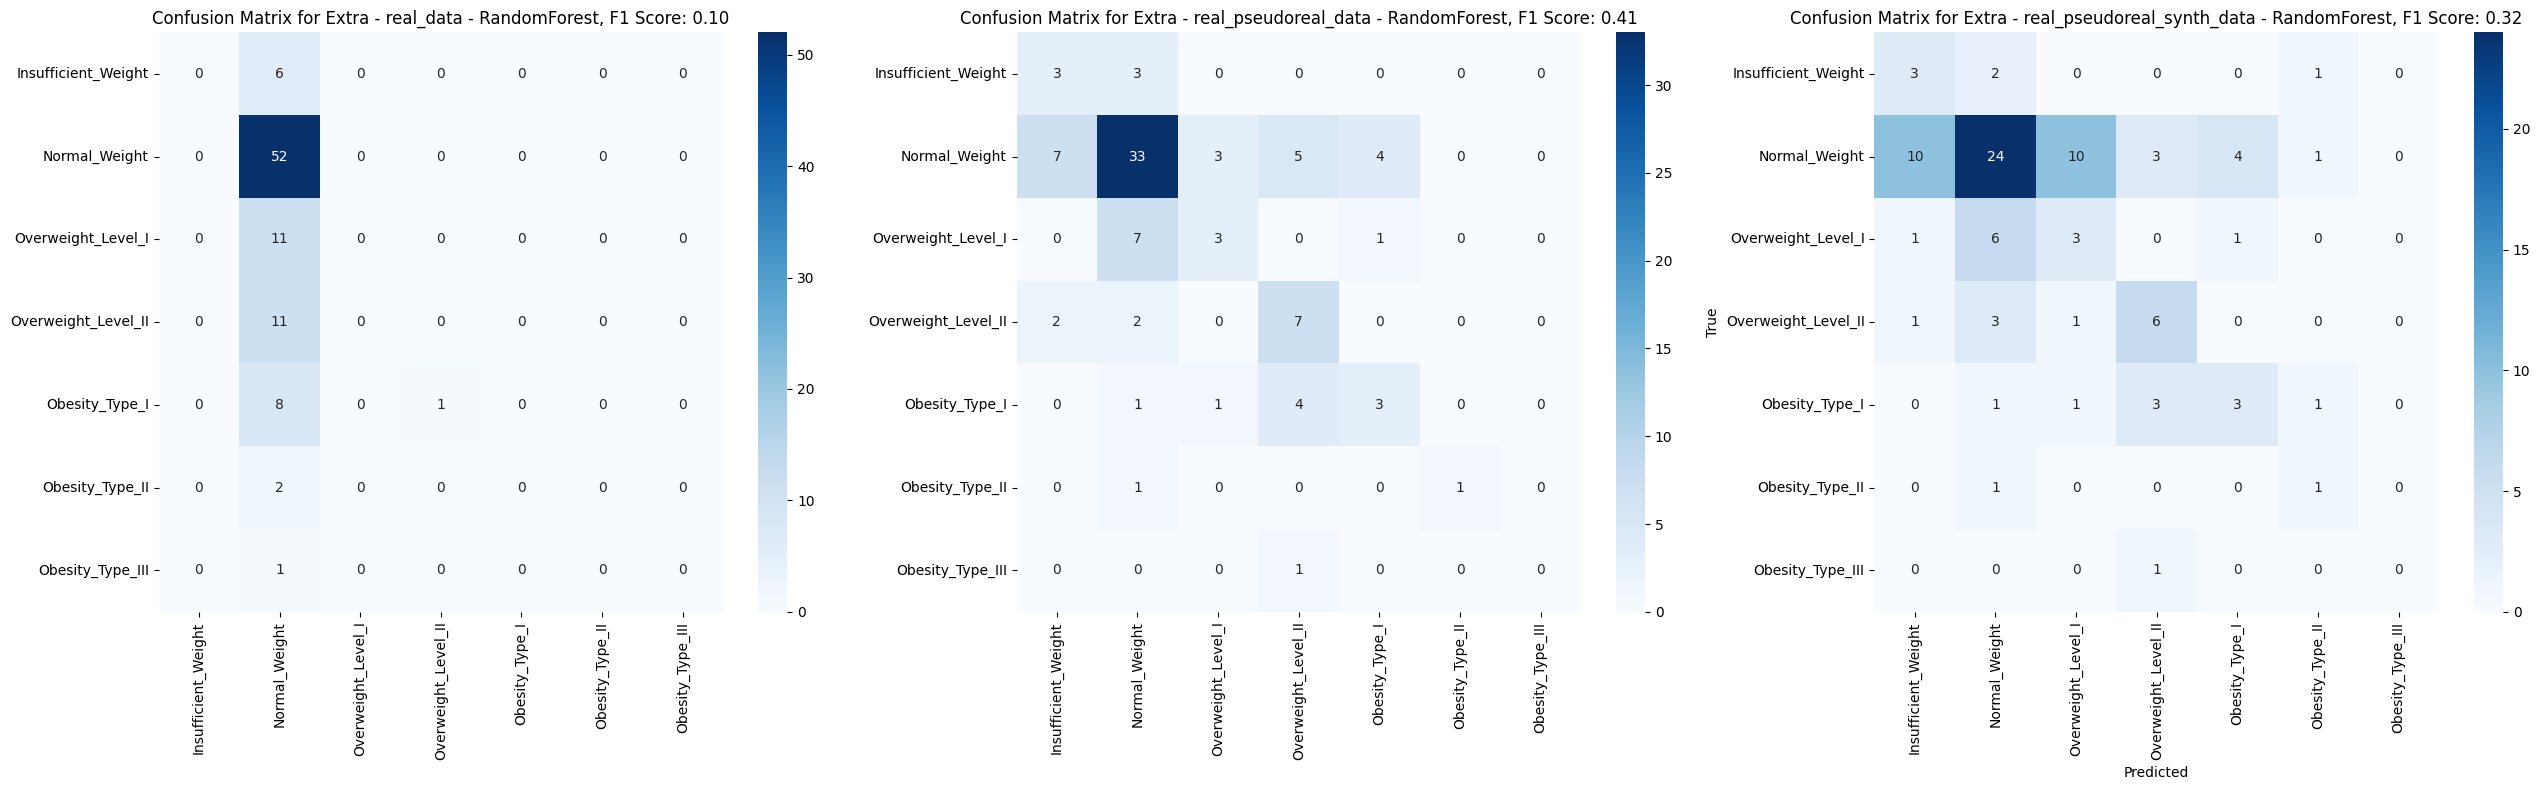

Extra - GradientBoosting - real_data
Extra - GradientBoosting - real_pseudoreal_data
Extra - GradientBoosting - real_pseudoreal_synth_data


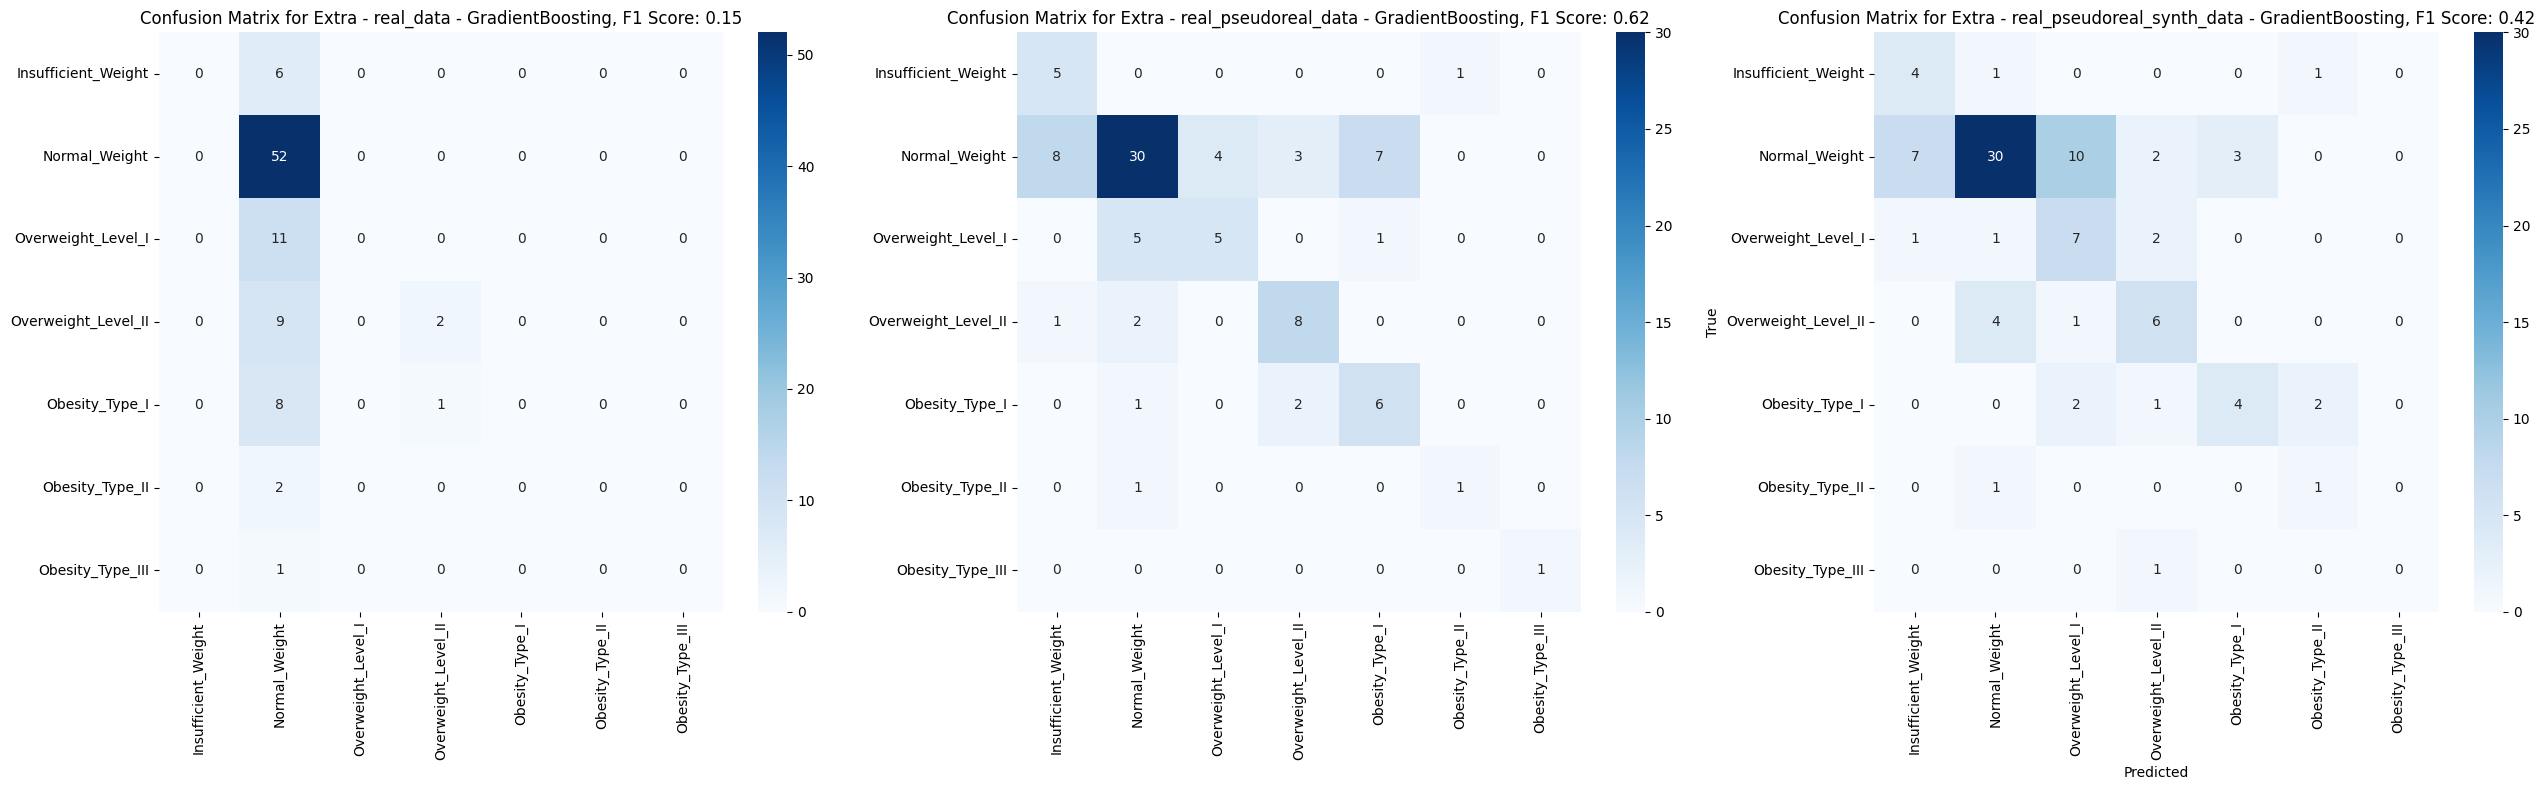

Extra - XGBoost - real_data
Extra - XGBoost - real_pseudoreal_data
Extra - XGBoost - real_pseudoreal_synth_data


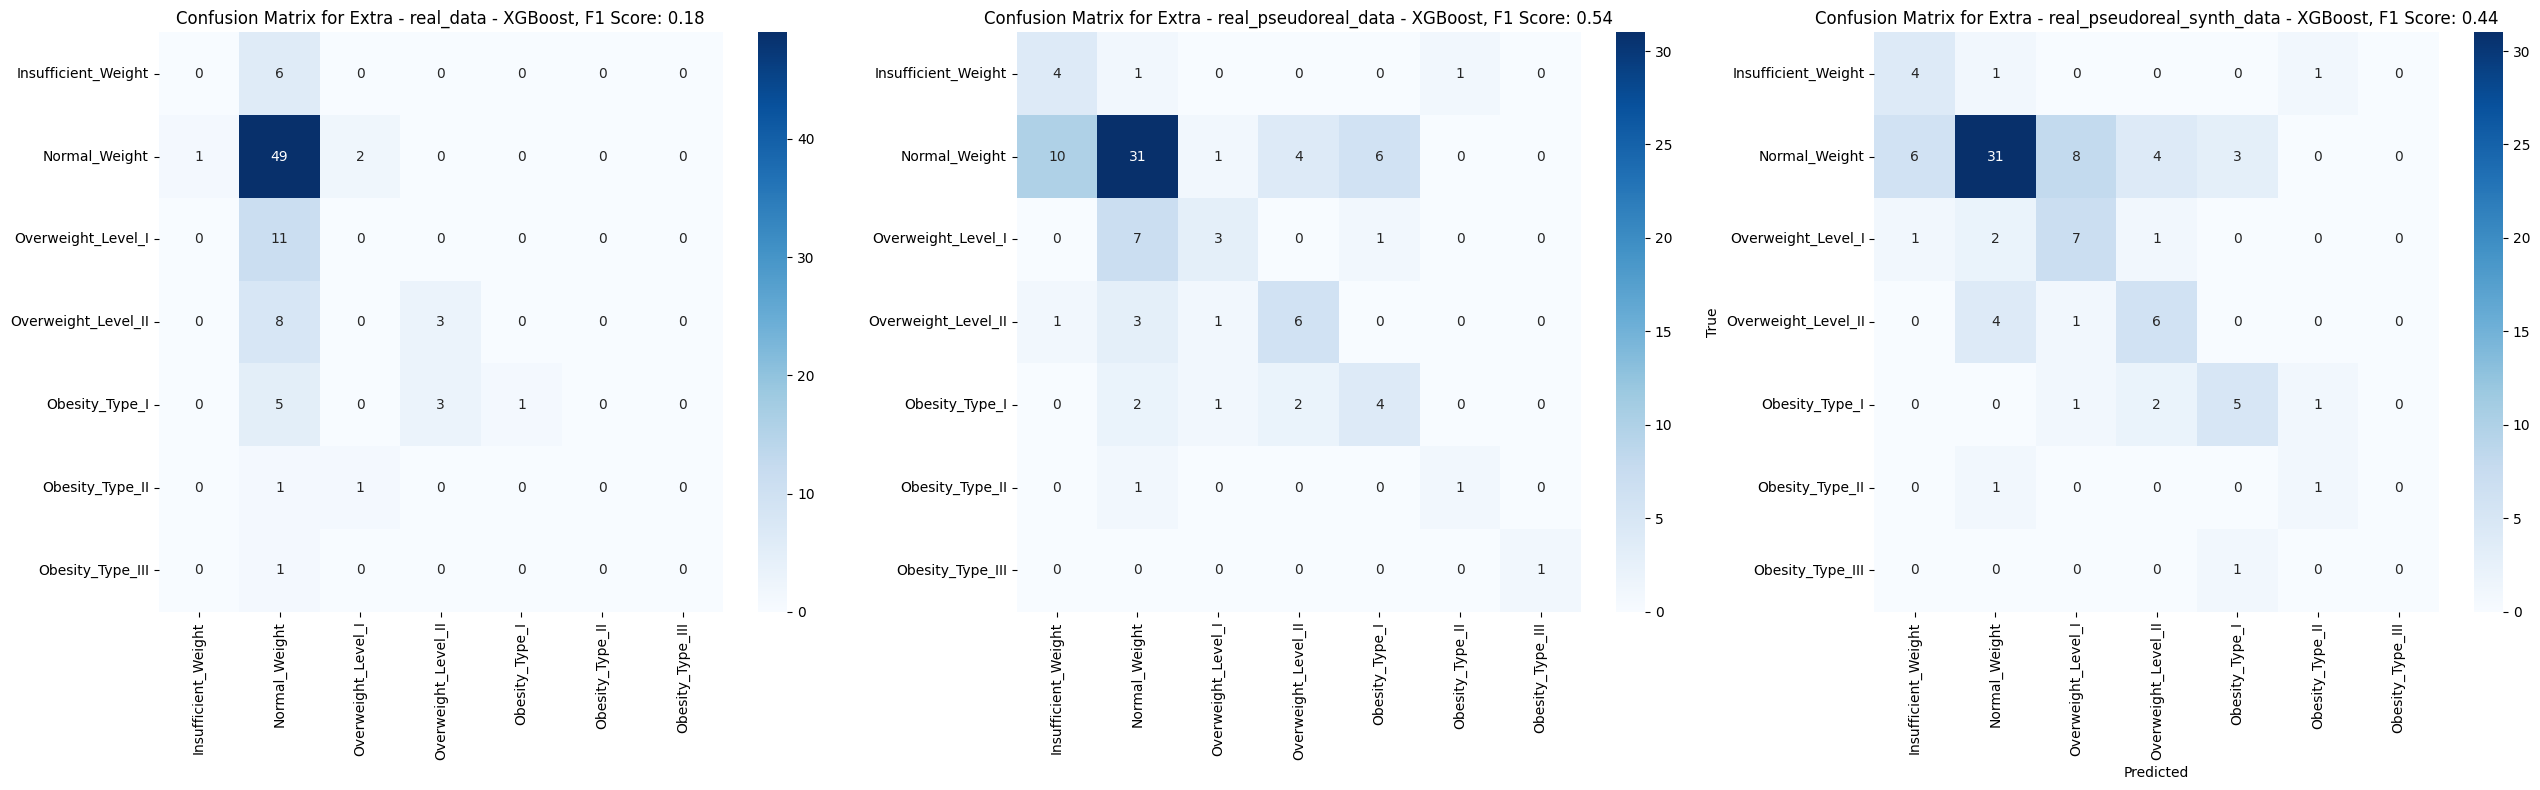

Extra - $k$NN - real_data
Extra - $k$NN - real_pseudoreal_data
Extra - $k$NN - real_pseudoreal_synth_data


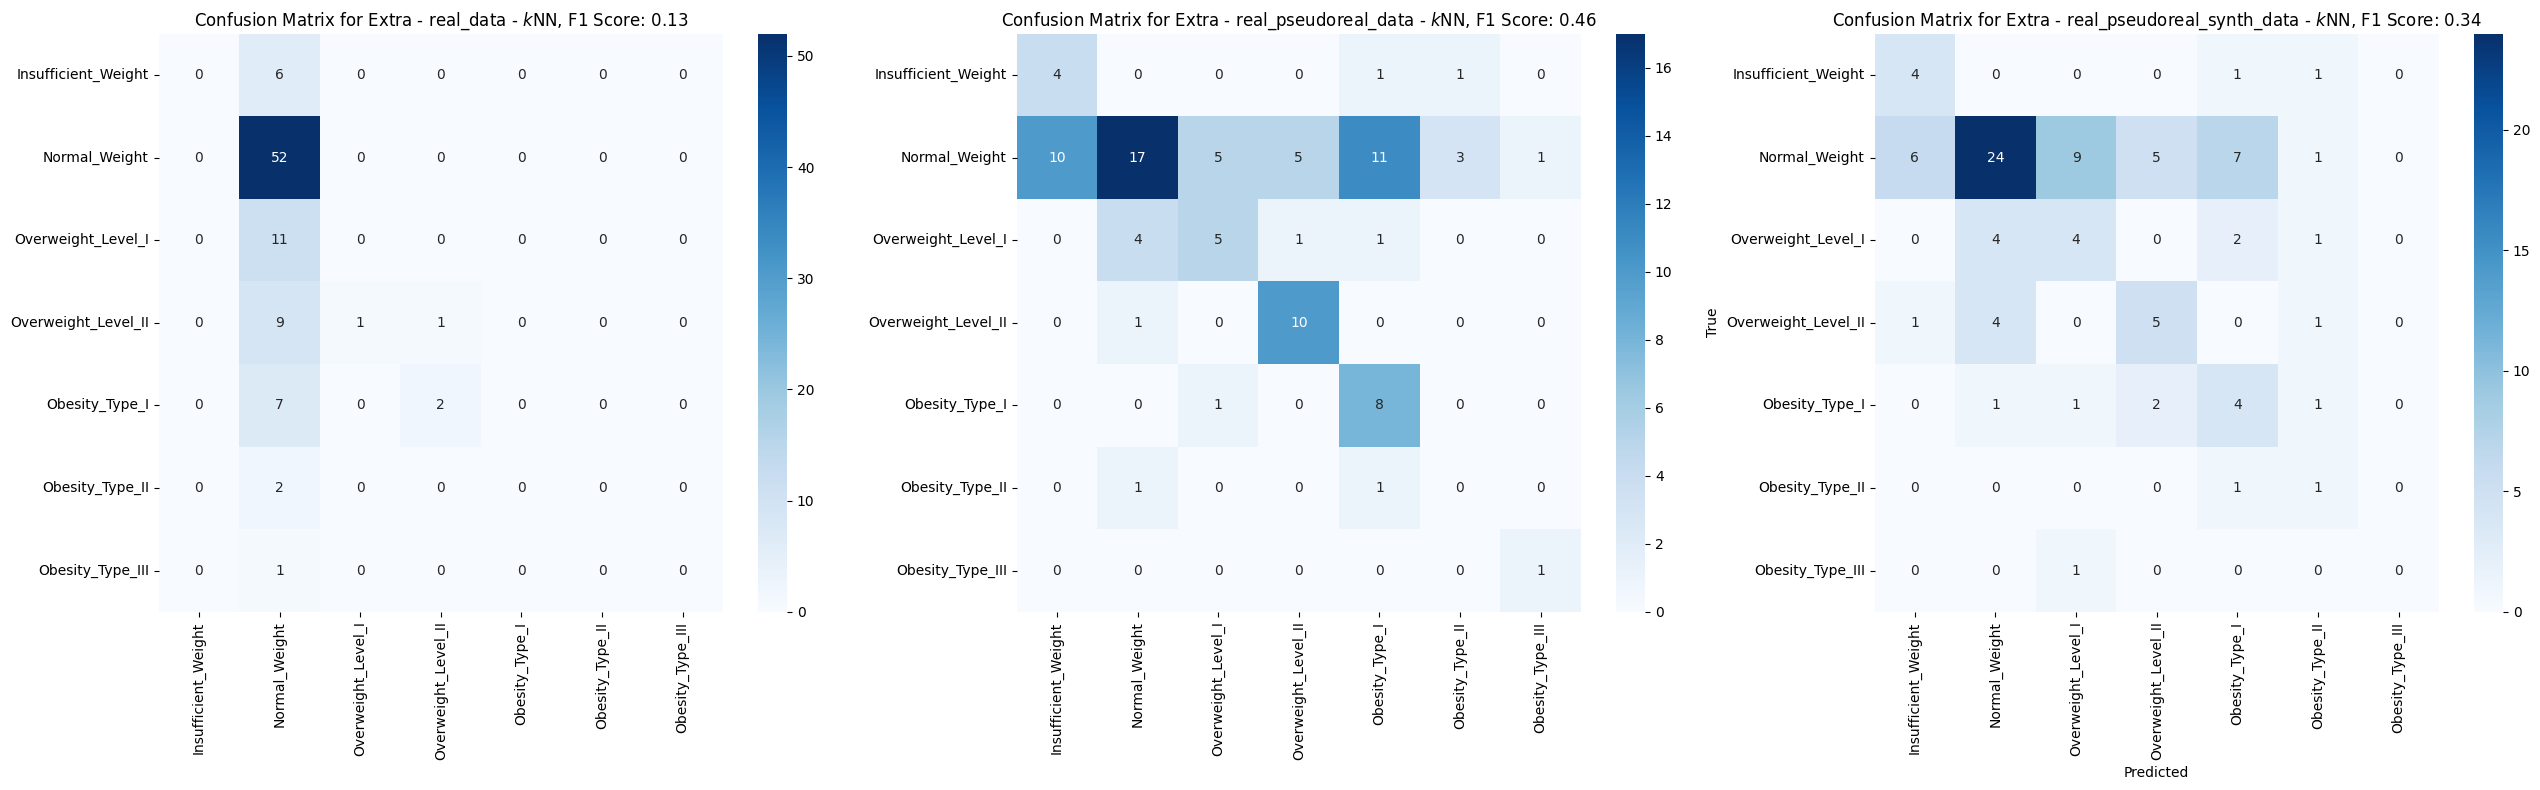

Extra - LGBM - real_data
Extra - LGBM - real_pseudoreal_data
Extra - LGBM - real_pseudoreal_synth_data


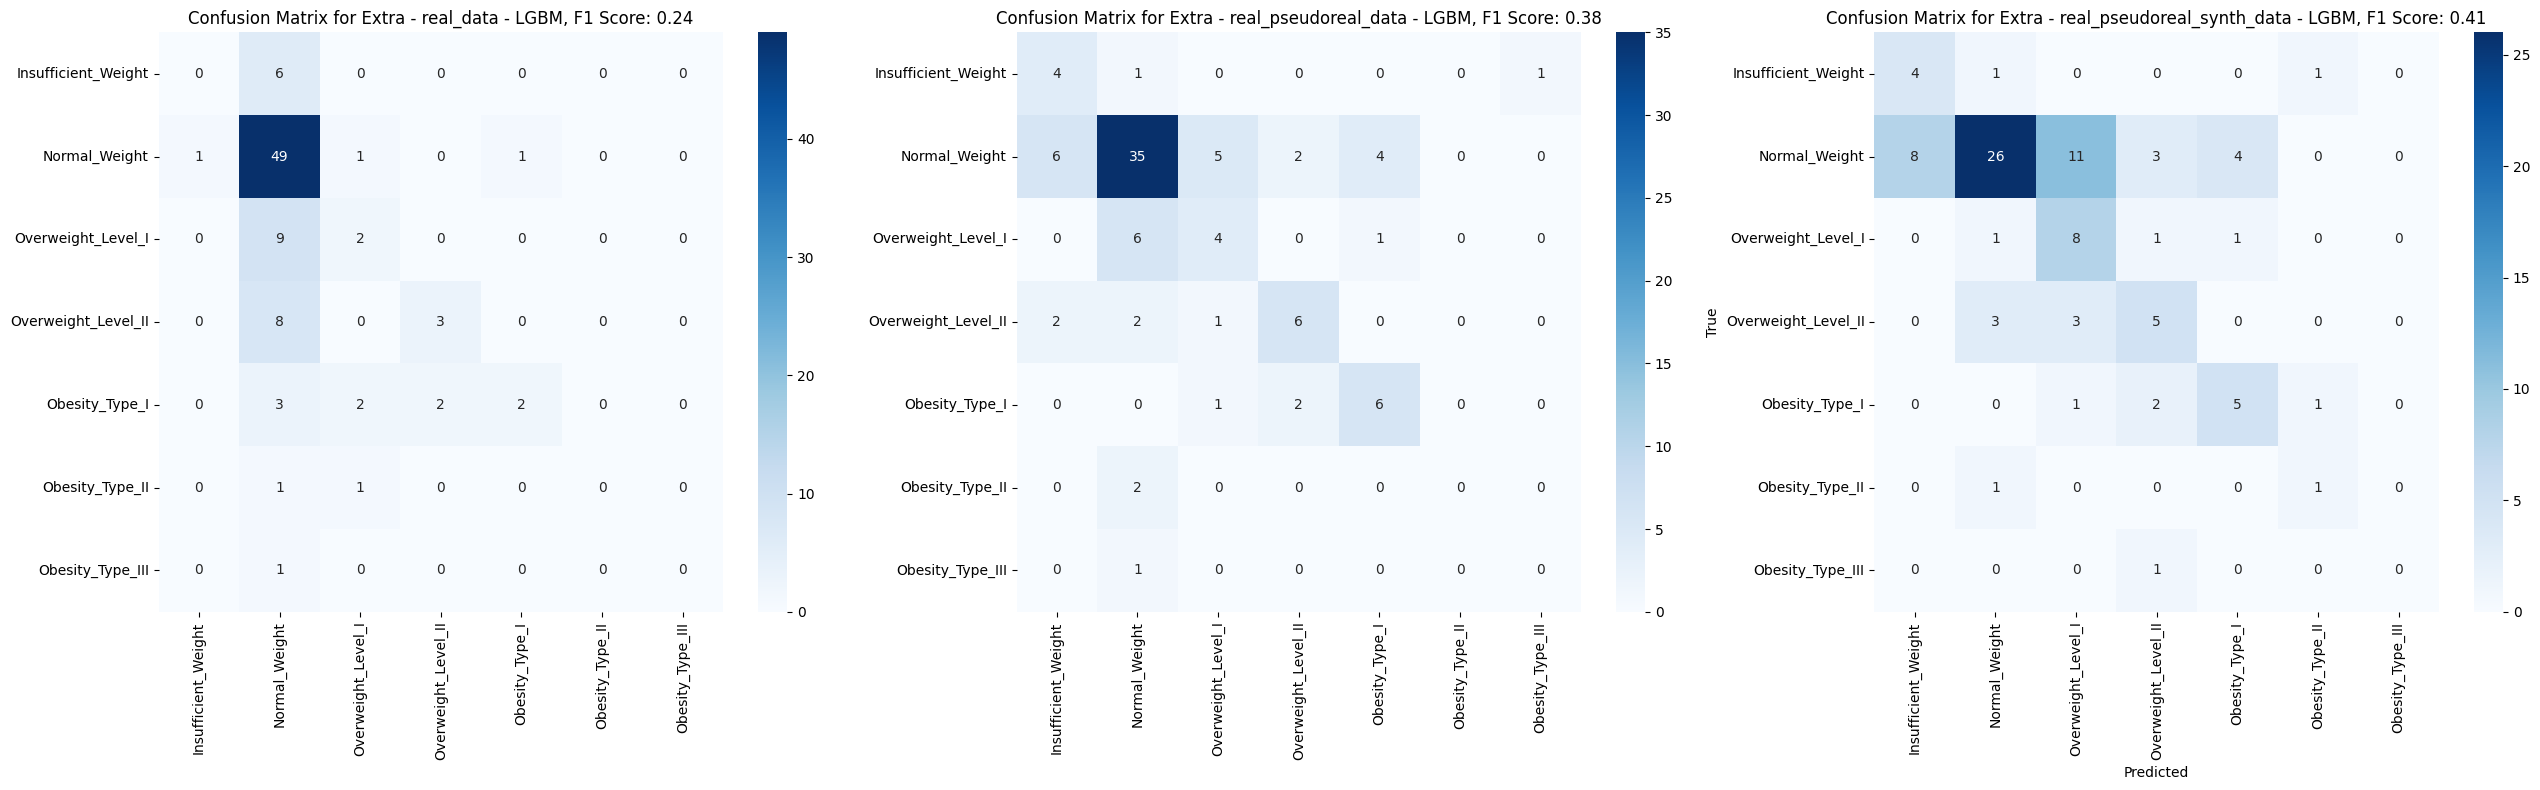

Extra - Decision Tree - real_data
Extra - Decision Tree - real_pseudoreal_data
Extra - Decision Tree - real_pseudoreal_synth_data


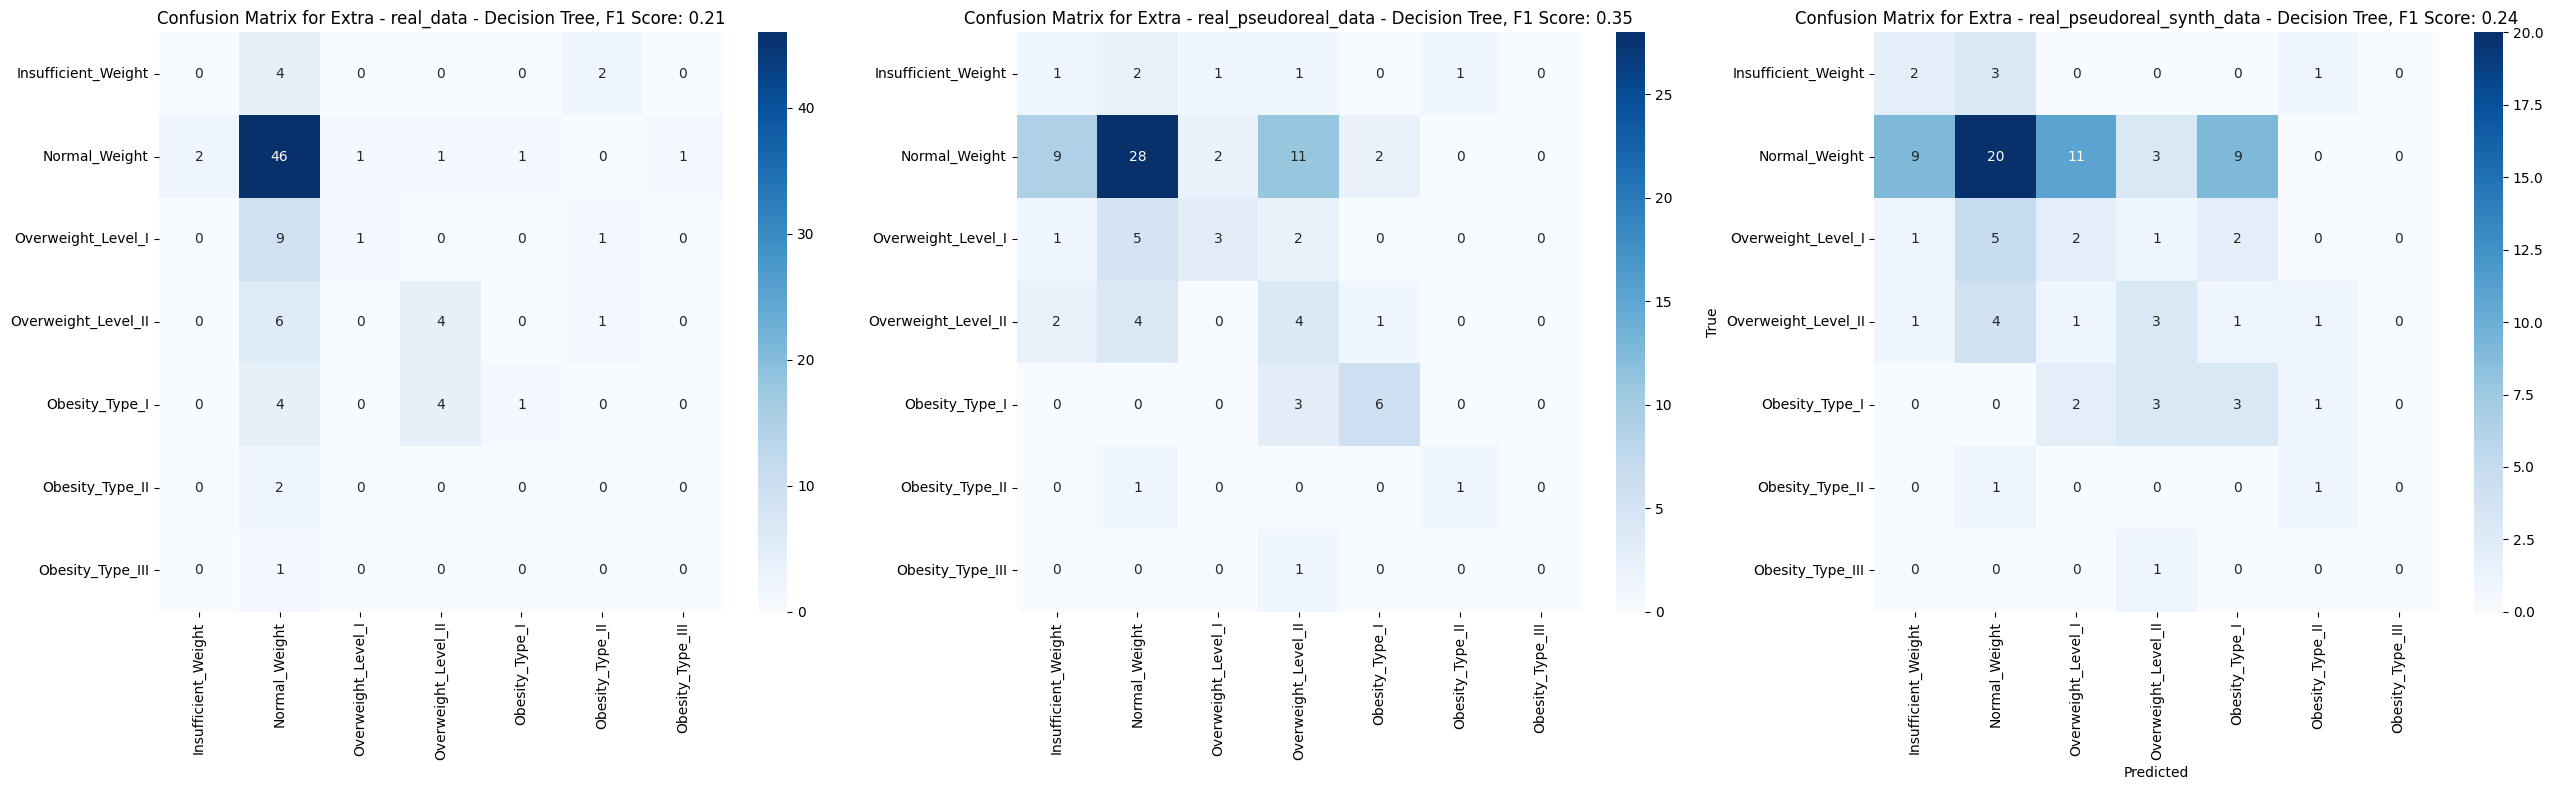

Extra - MLPClassifier - real_data
Extra - MLPClassifier - real_pseudoreal_data
Extra - MLPClassifier - real_pseudoreal_synth_data


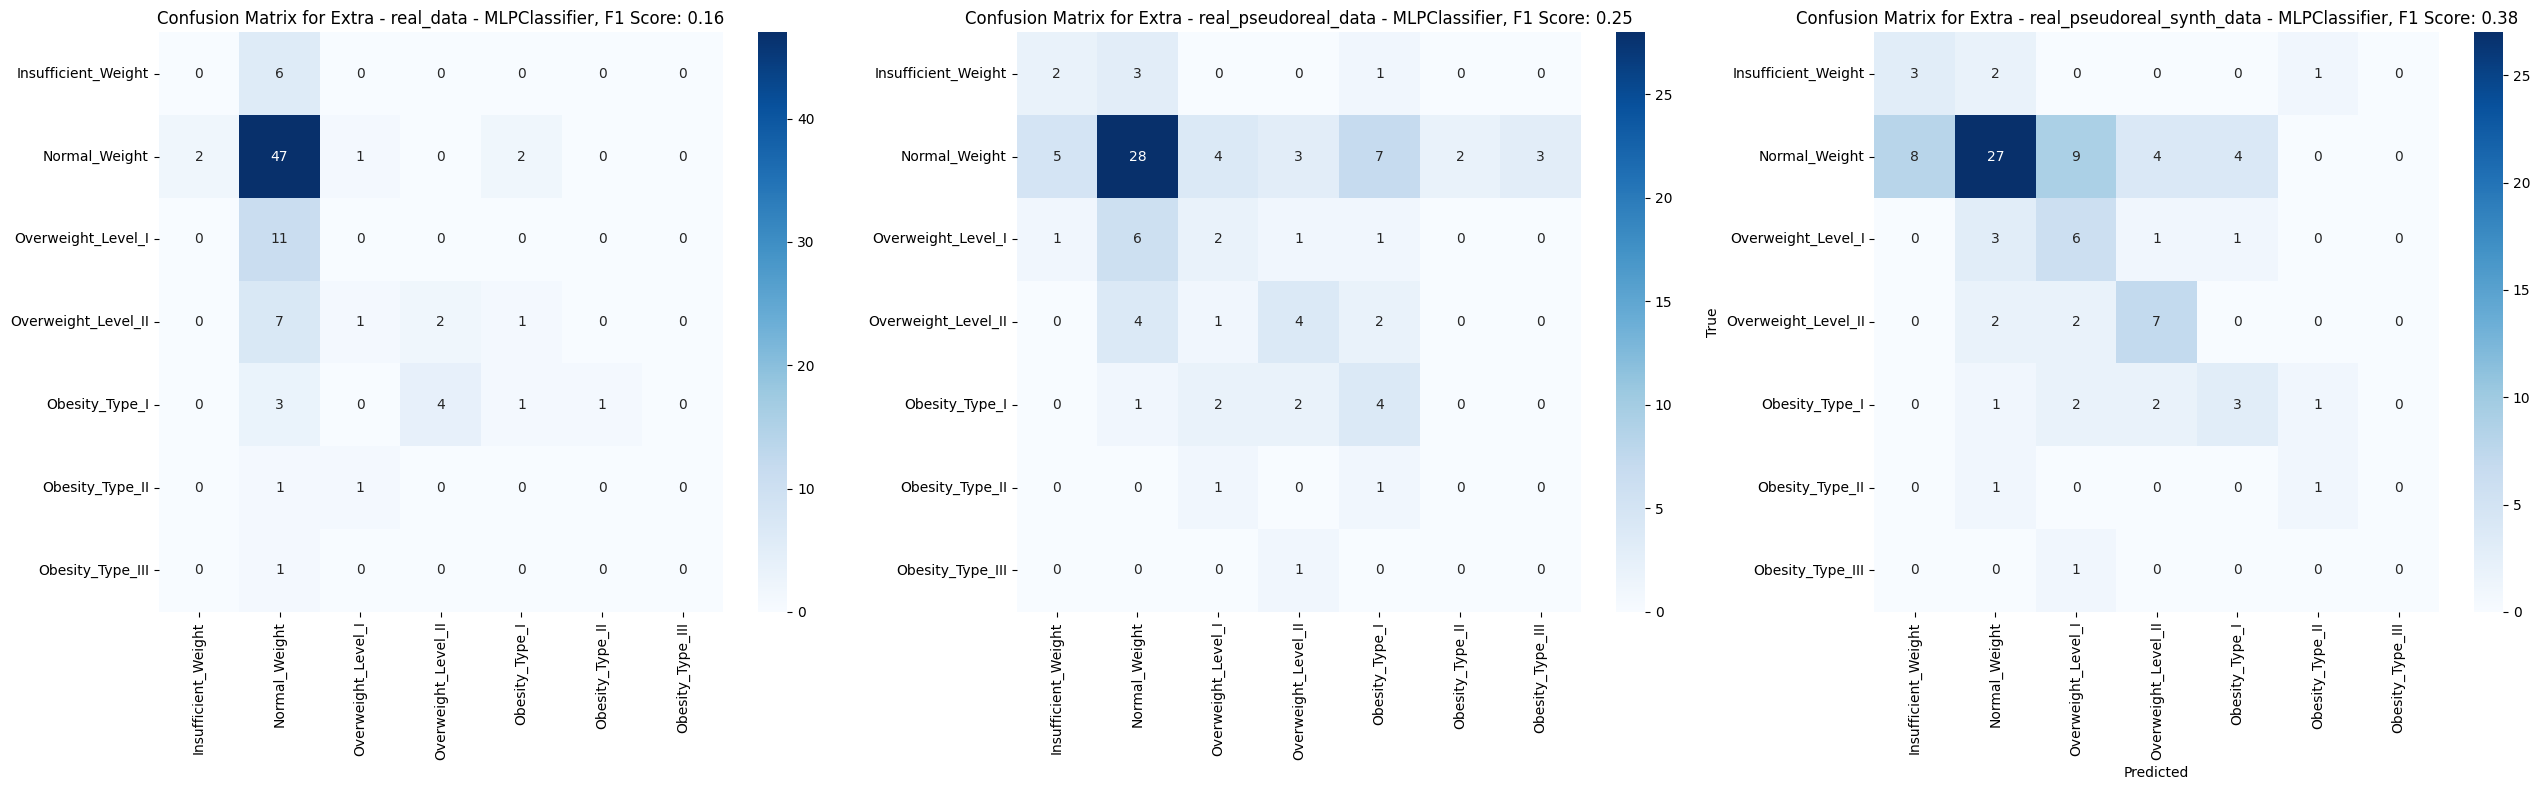

Extra - Baseline - real_data
Extra - Baseline - real_pseudoreal_data
Extra - Baseline - real_pseudoreal_synth_data


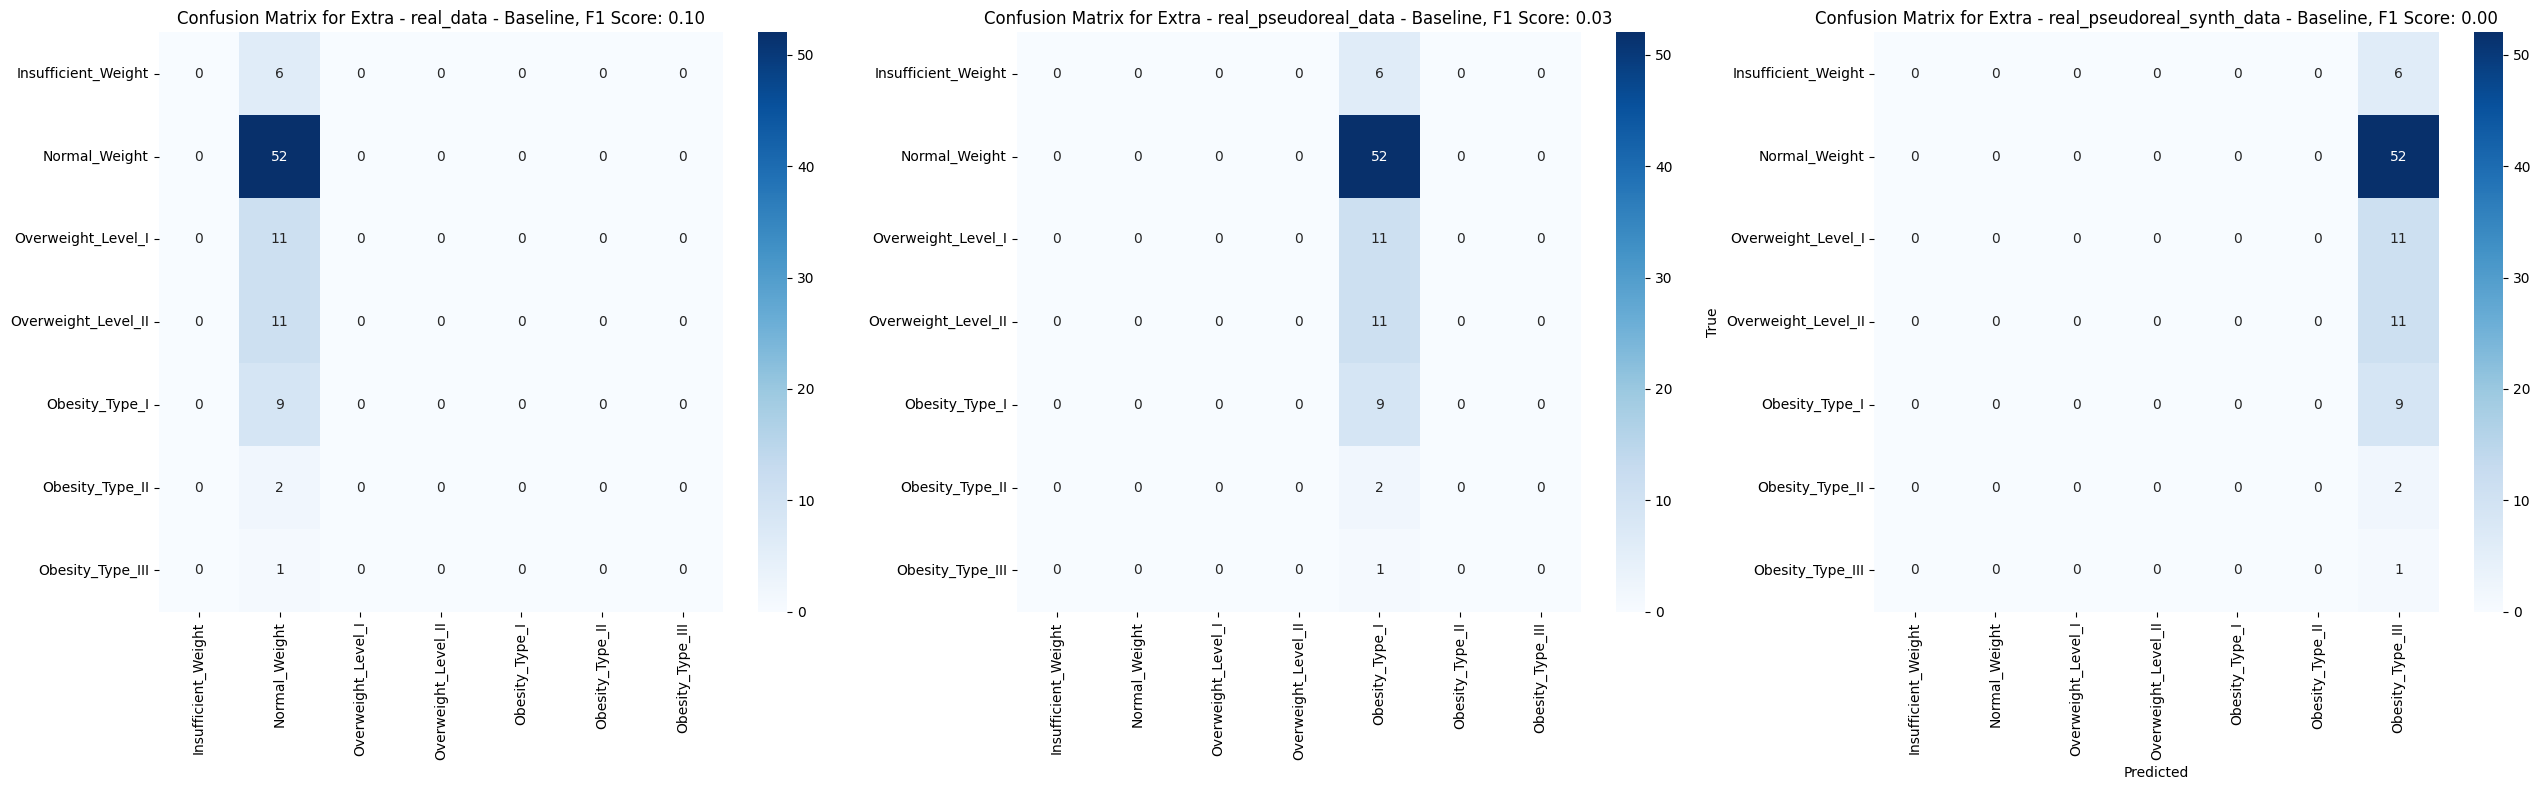

In [72]:

for approach, models in plots.items():
    
    for model_name, datasets in models.items():
        i = 0
        # Create a figure for the confusion matrix and feature importance
        if approach == 'Initial':
            fig, axes = plt.subplots(1, 2, figsize=(18, 8))
            axes = axes.flatten()
        else:
            fig, axes = plt.subplots(1, 3, figsize=(26, 8))
            axes = axes.flatten()
        
        for dataset_name, model_results in datasets.items():
            ax = axes[i]
            print(f'{approach} - {model_name} - {dataset_name}')
            # Plotting
            sns.heatmap(model_results['cm'], annot=True, fmt='d', cmap='Blues', xticklabels=list(reversed_target_map.values()), yticklabels=list(reversed_target_map.values()), ax=ax)
            ax.set_title(f'Confusion Matrix for {approach} - {dataset_name} - {model_name}, F1 Score: {model_results["f1"]:.2f}')
            plt.xlabel('Predicted')
            plt.ylabel('True')

            i += 1
        plt.tight_layout()
        plt.show()

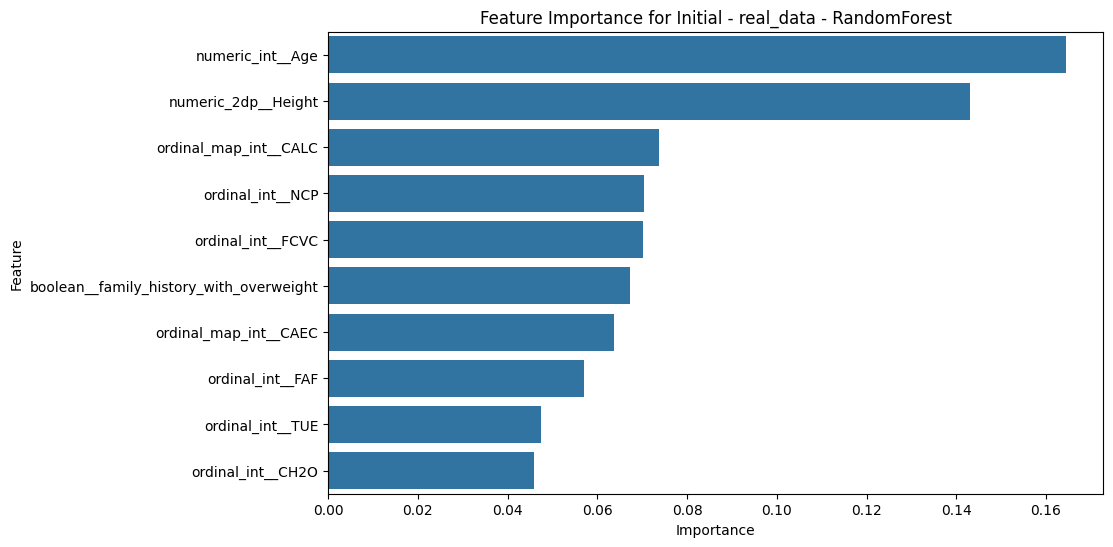

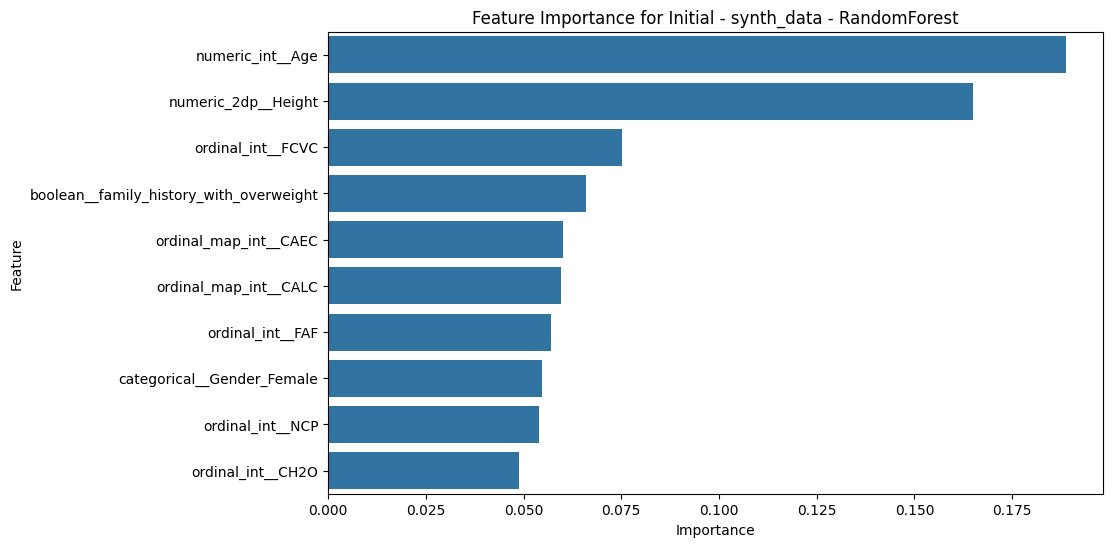

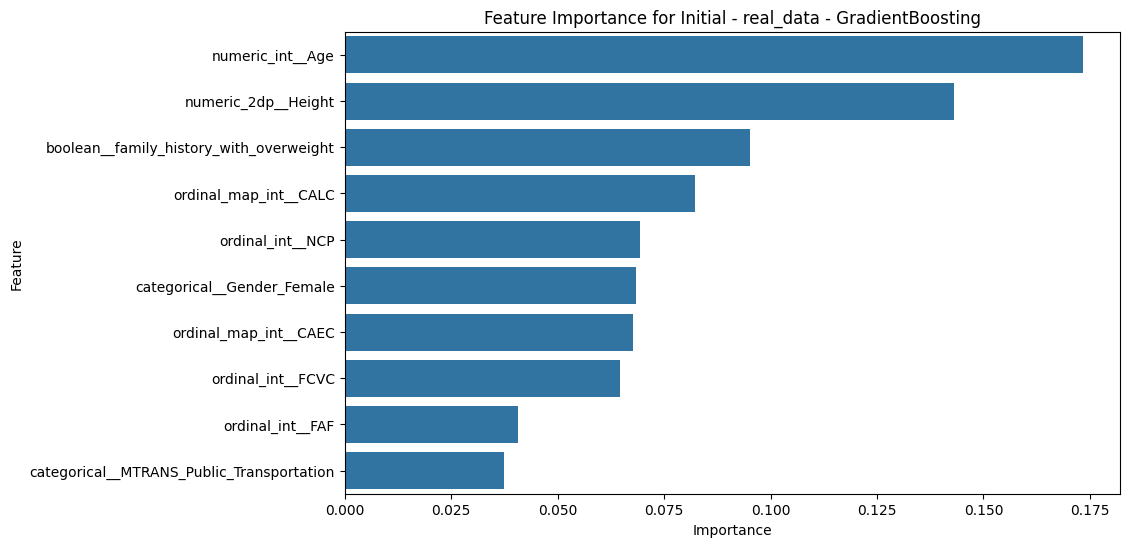

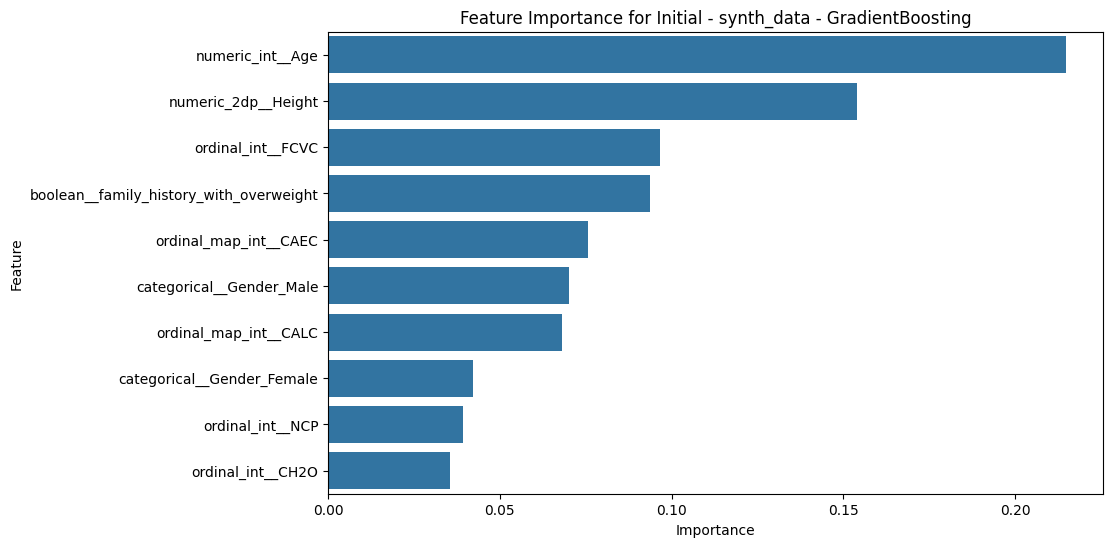

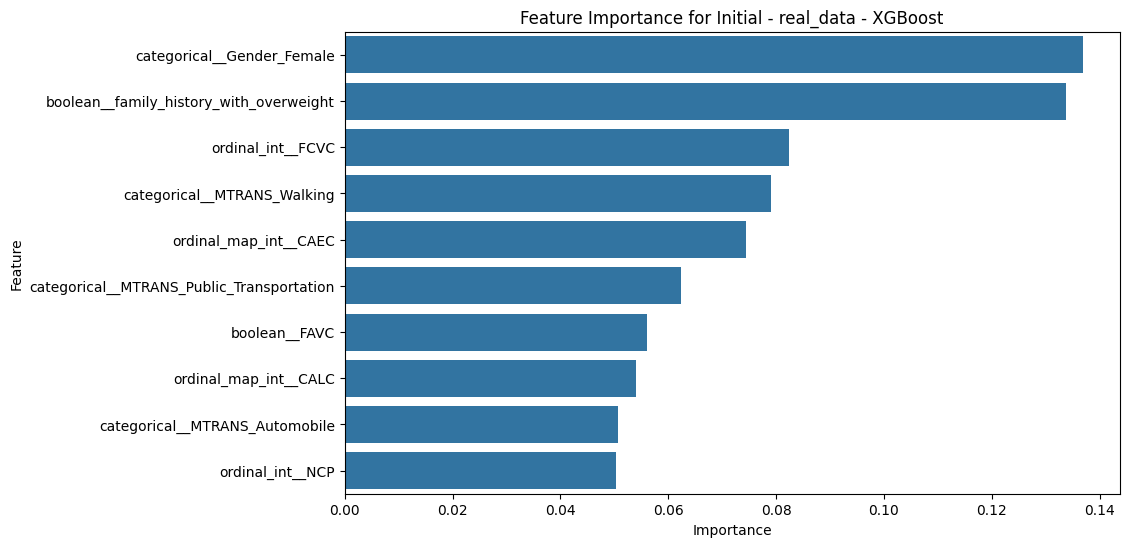

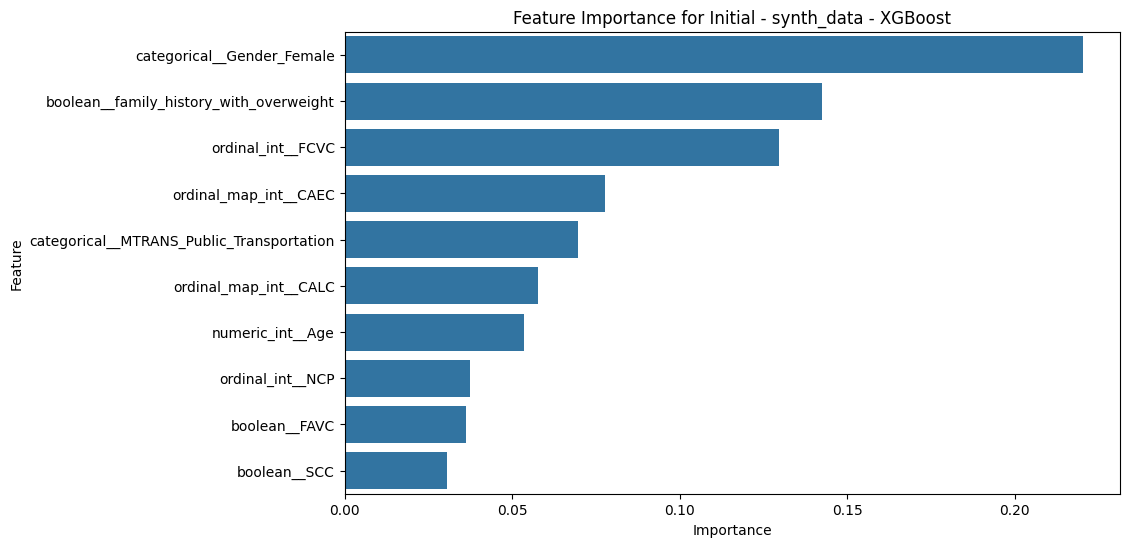

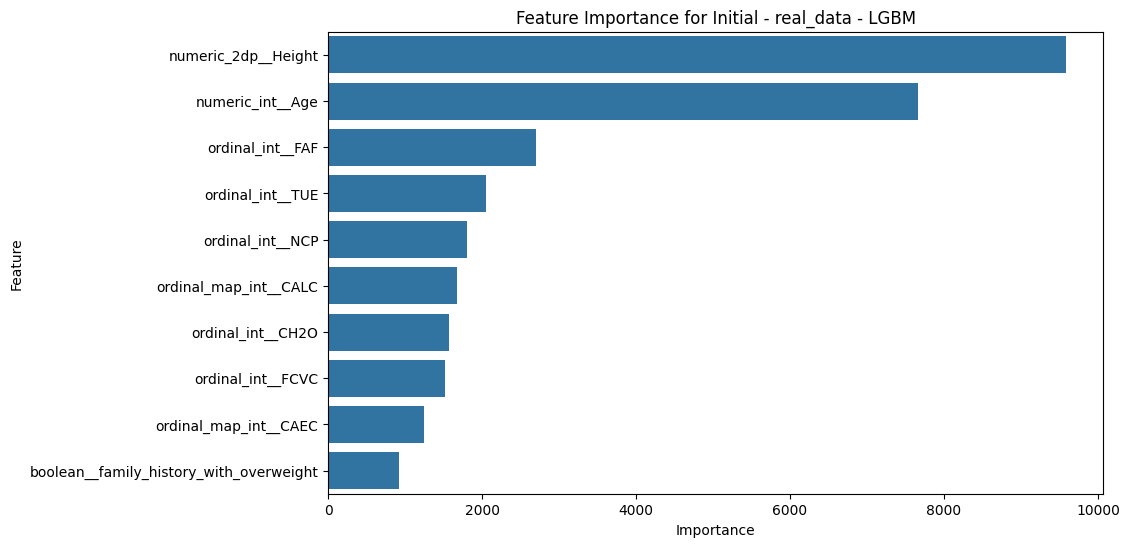

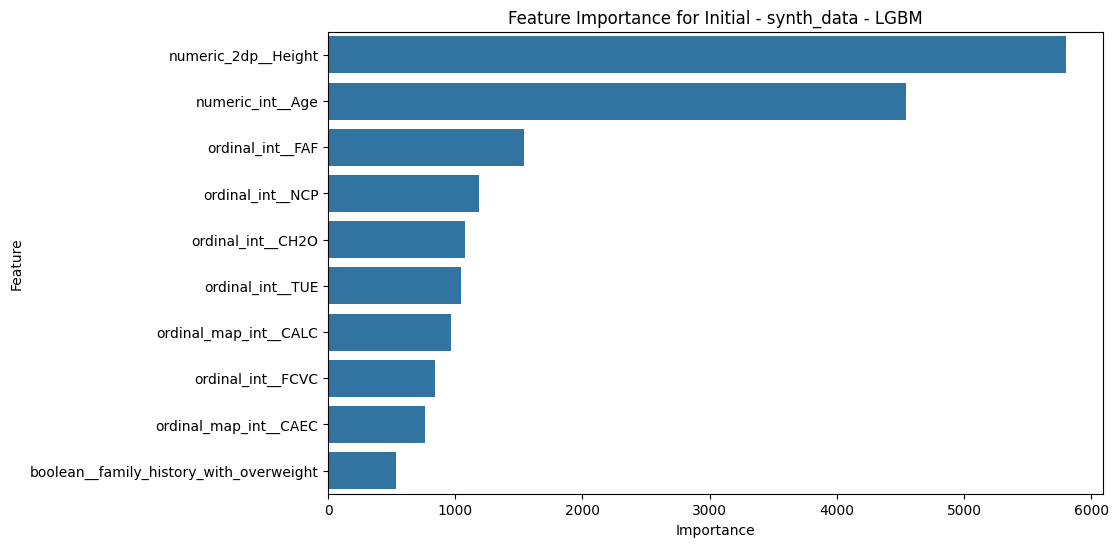

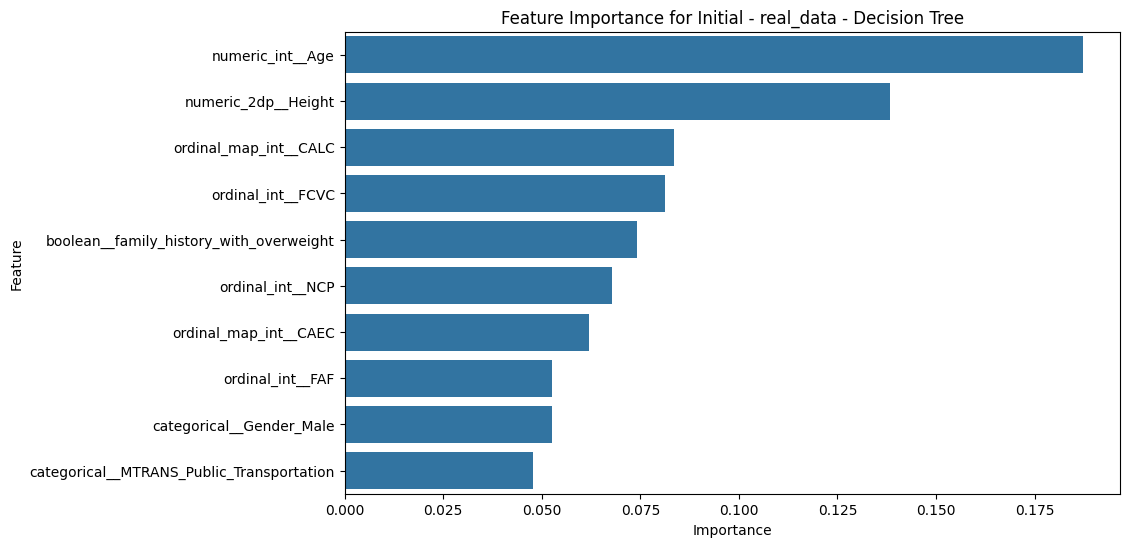

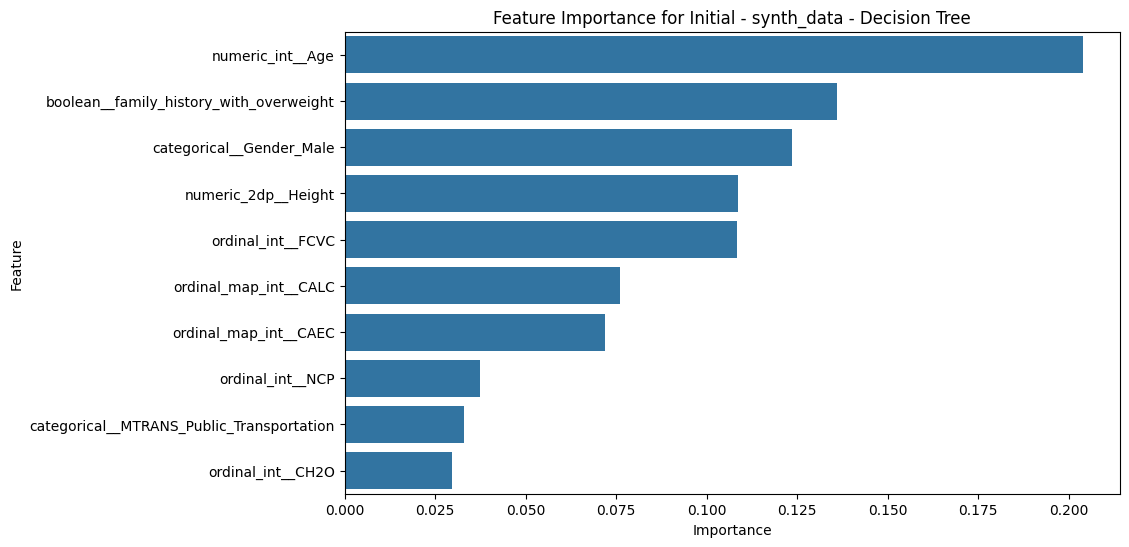

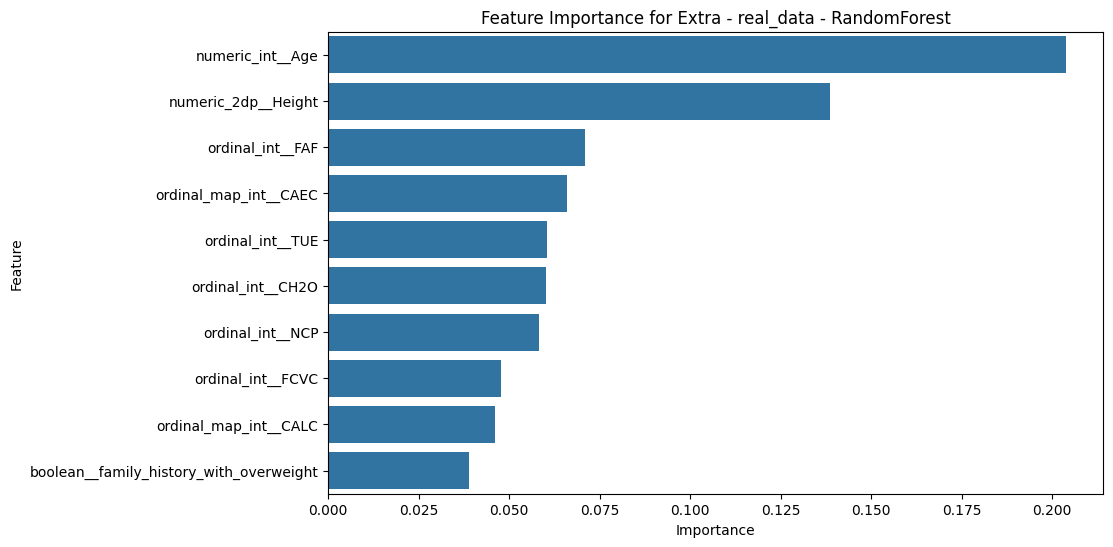

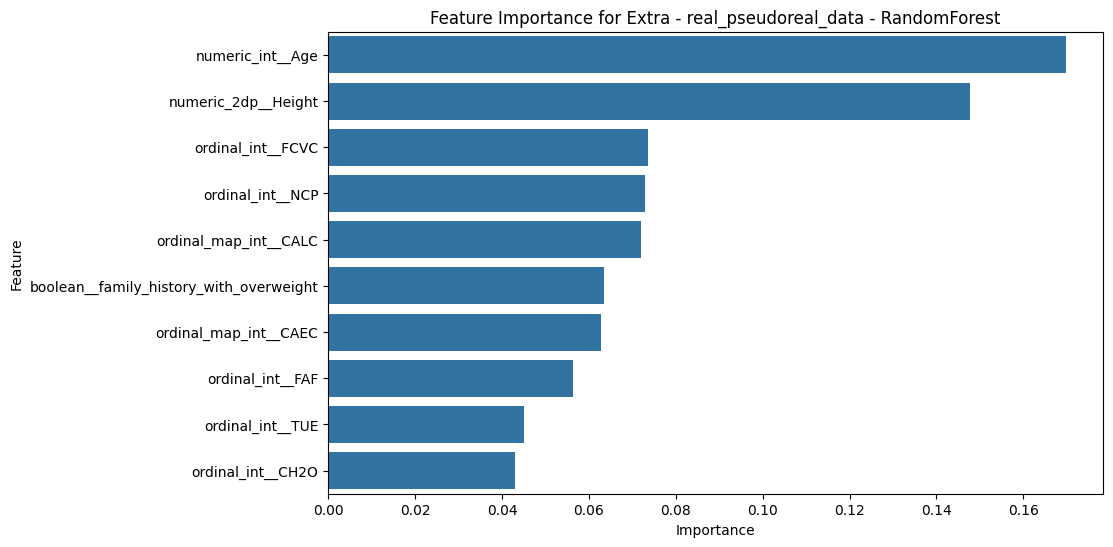

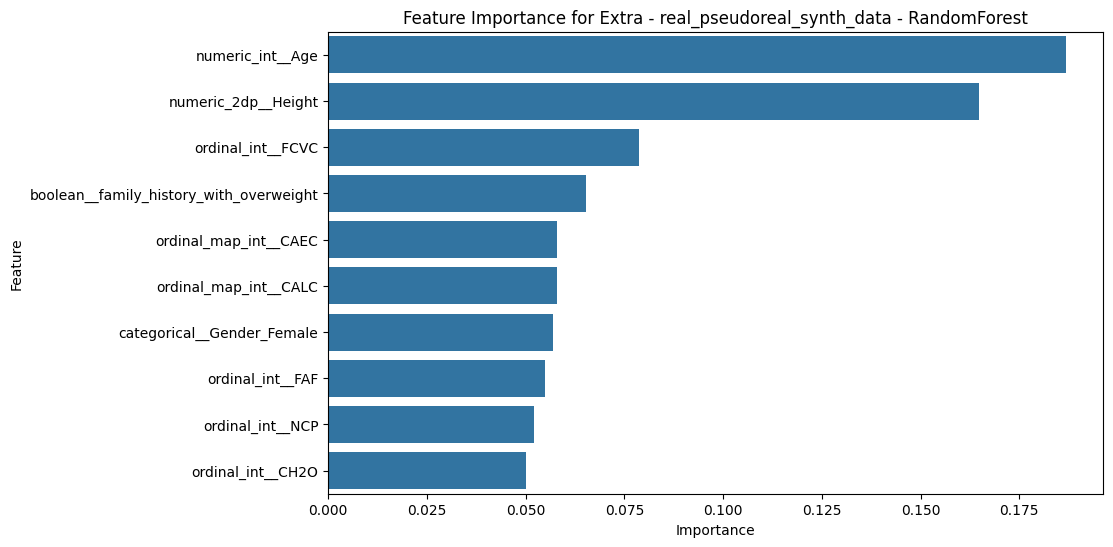

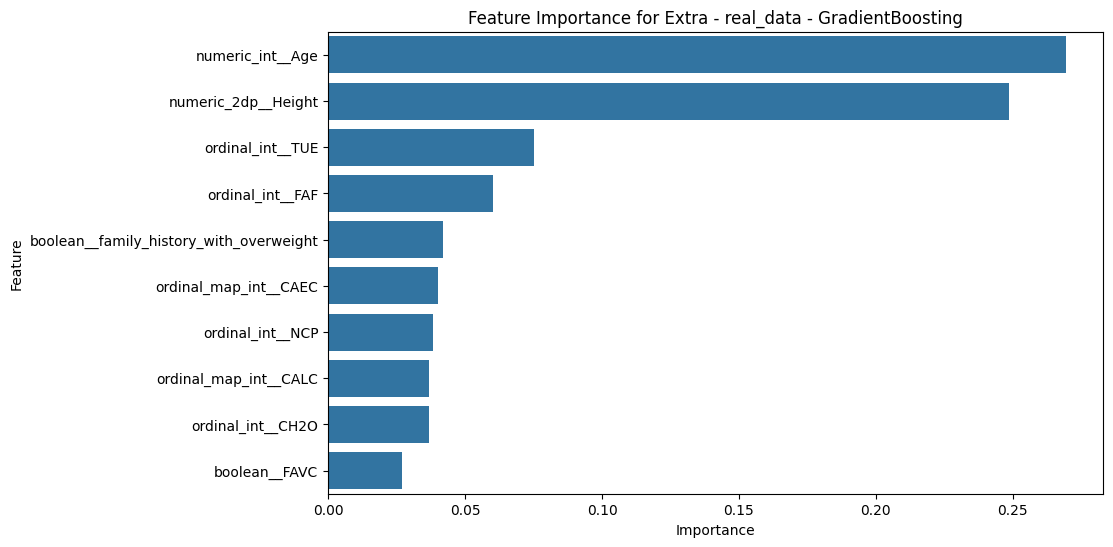

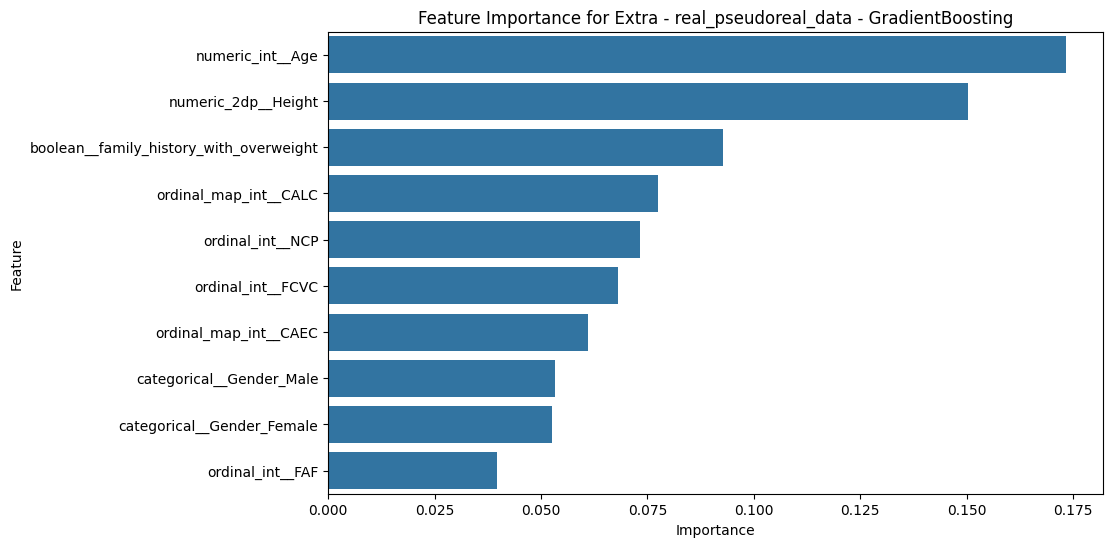

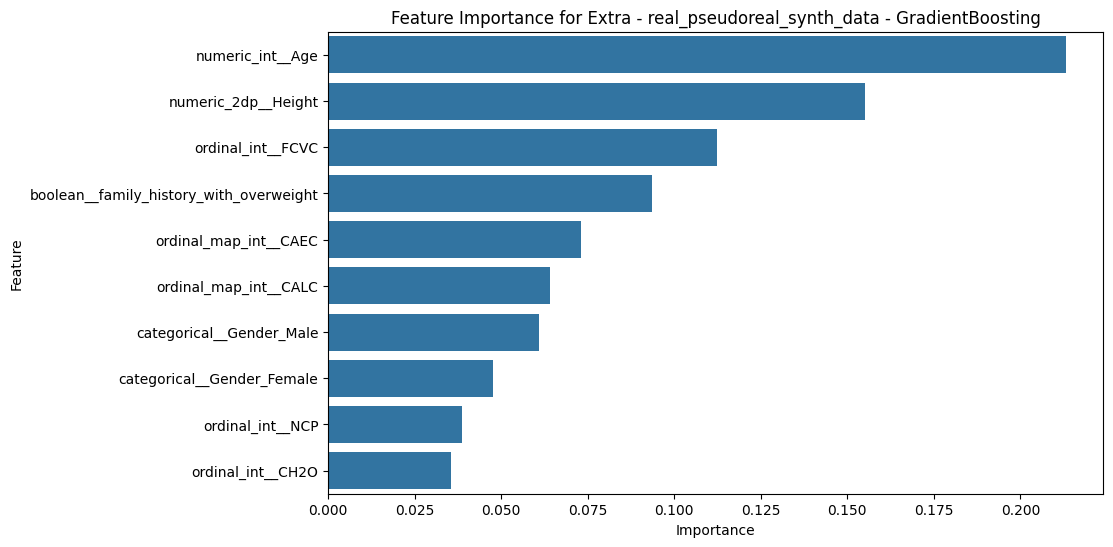

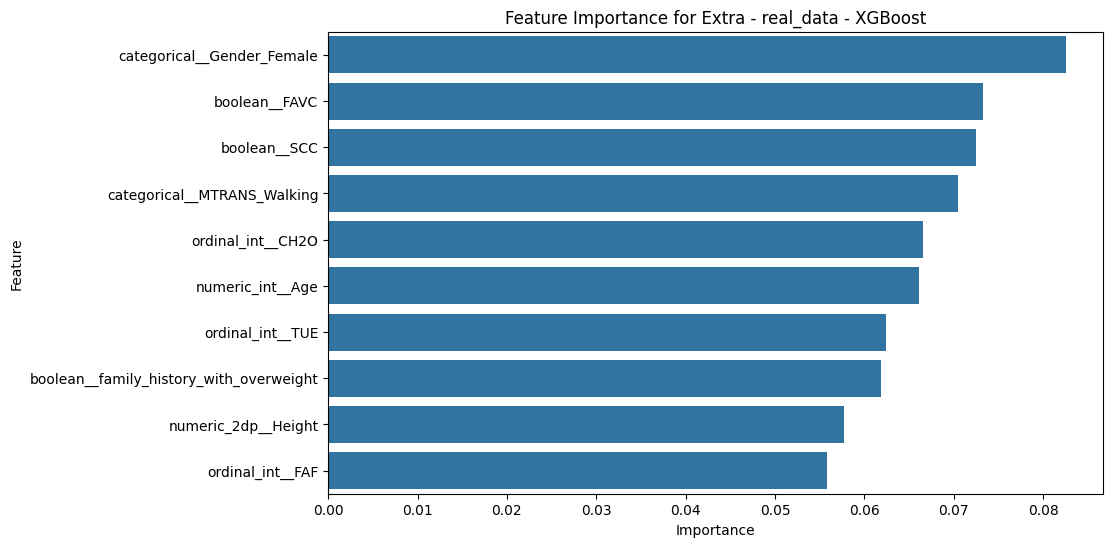

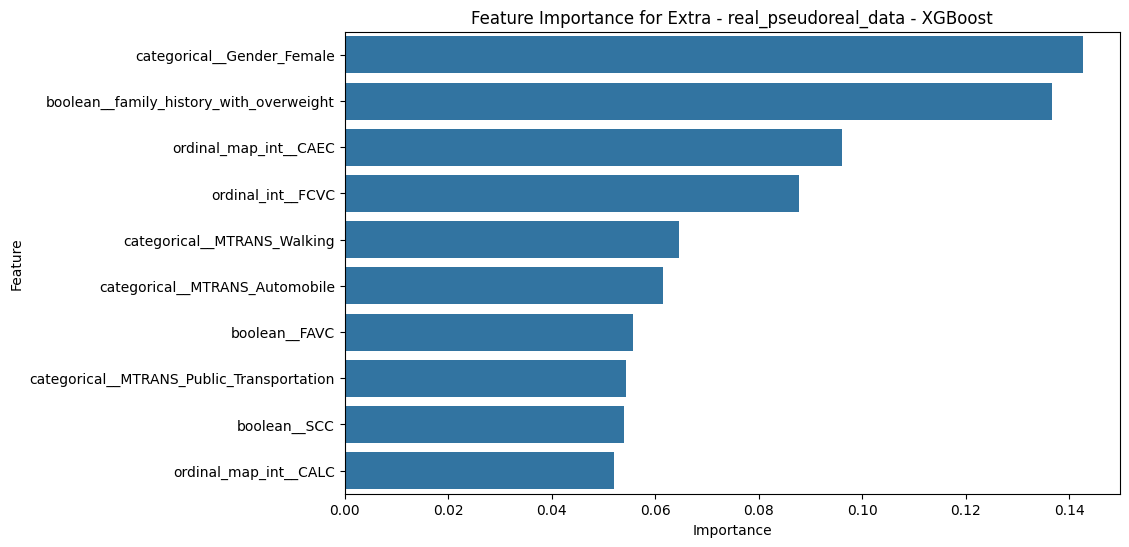

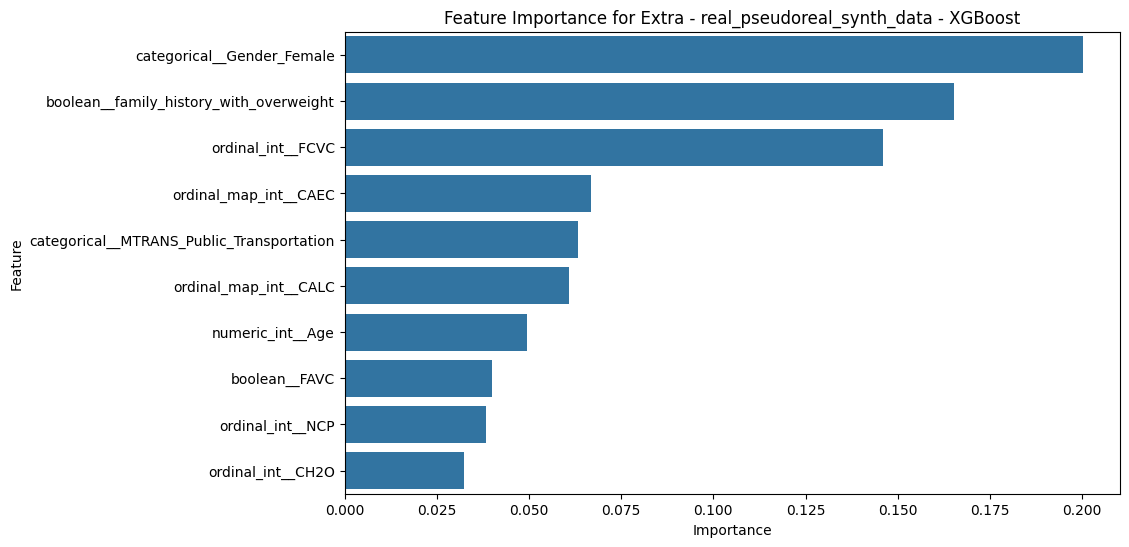

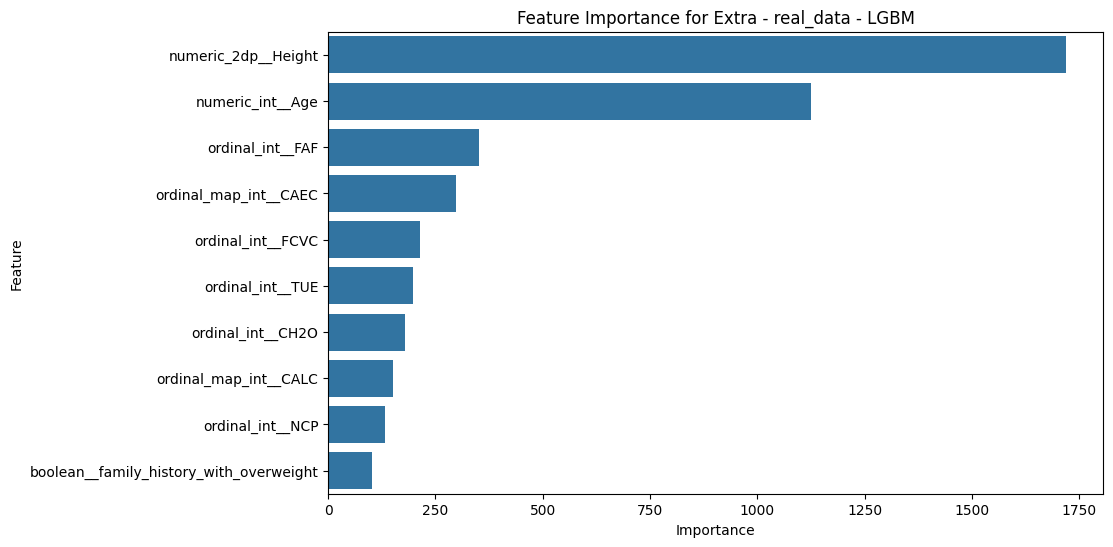

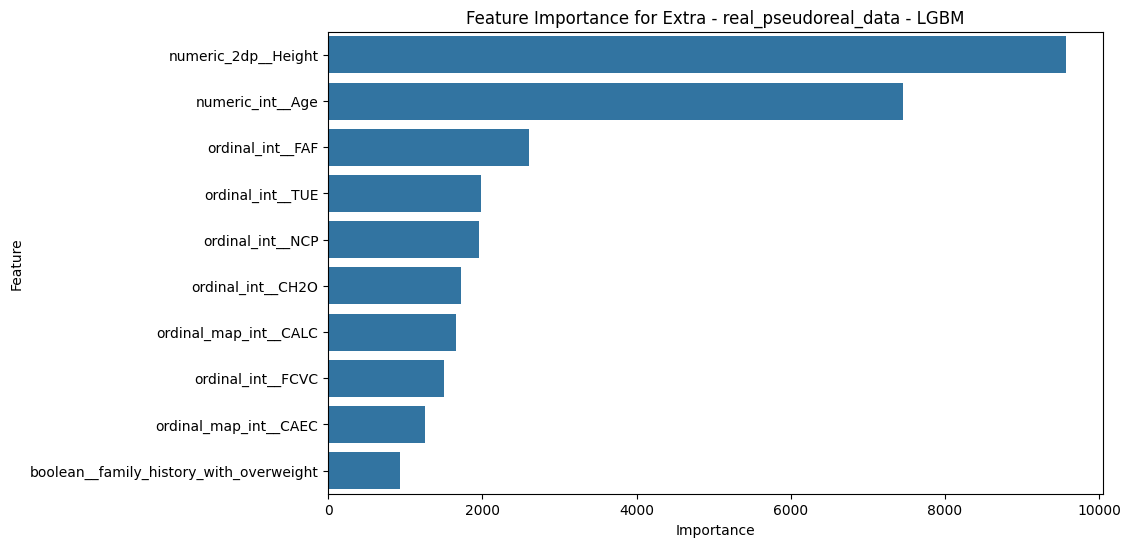

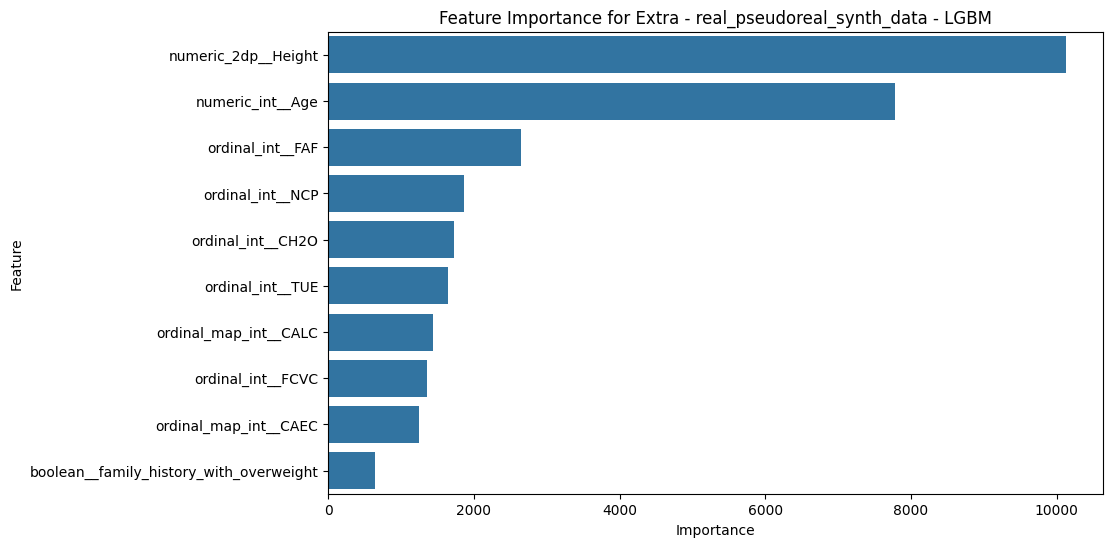

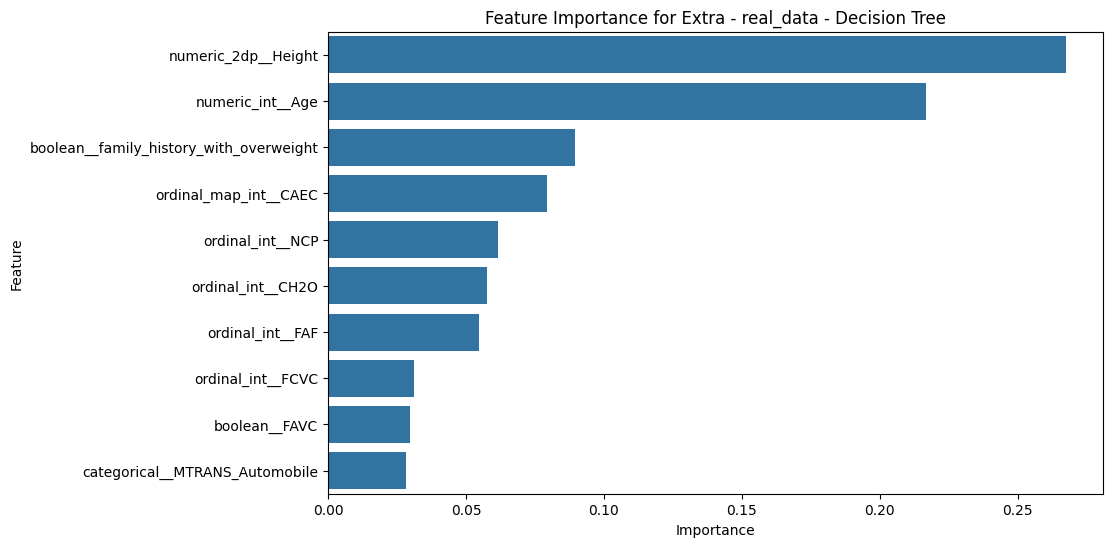

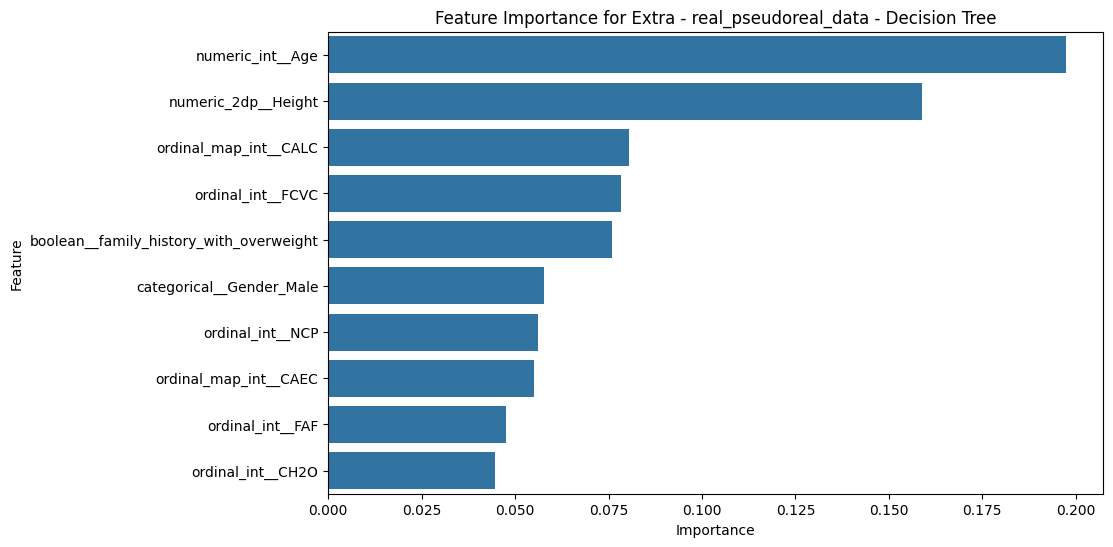

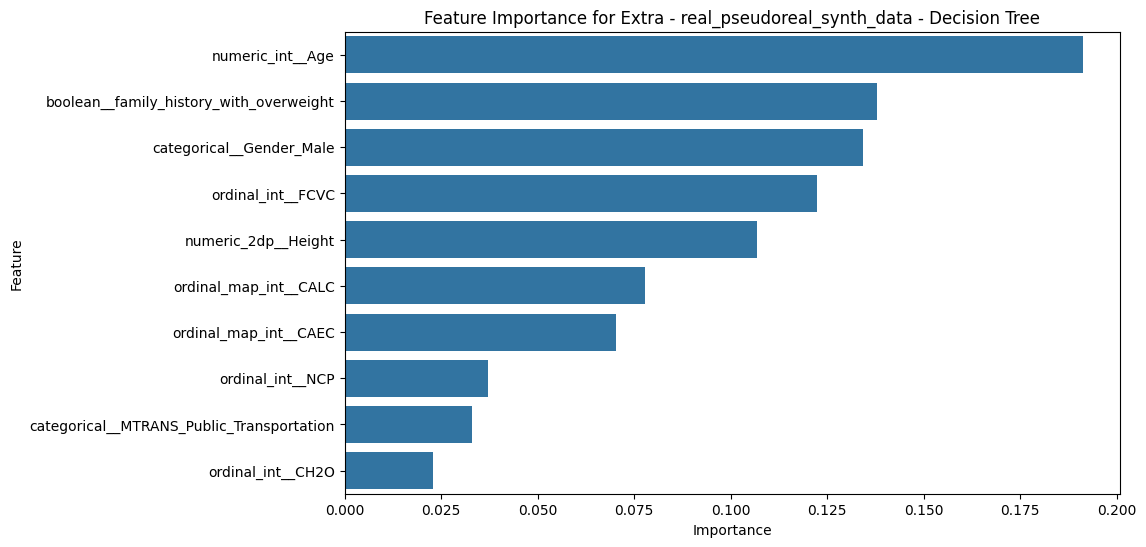

In [73]:
# Plot feature importance
for approach, models in plots.items():
    for model_name, datasets in models.items():
        for dataset_name, model_results in datasets.items():
            if model_results['fi'] is not None:
                plt.figure(figsize=(10, 6))
                sns.barplot(x='Importance', y='Feature', data=model_results['fi'].head(10))
                plt.title(f'Feature Importance for {approach} - {dataset_name} - {model_name}')
                plt.xlabel('Importance')
                plt.ylabel('Feature')
                plt.show()

In [74]:
# Classification report
for dataset, models in results.items():
    print(f"Dataset: {dataset}")
    for model_name, model_results in models.items():
        y_pred = model_results['fitted_model'].predict(X_test)
        print(f"  Model: {model_name}")
        print(classification_report(y_test, y_pred, zero_division=0, labels=list(target_map.values()), target_names=list(target_map.keys())))
        print("\n")

Dataset: Initial_real_data
  Model: RandomForest
                     precision    recall  f1-score   support

Insufficient_Weight       0.71      0.83      0.77         6
      Normal_Weight       0.90      0.90      0.90        52
 Overweight_Level_I       0.89      0.73      0.80        11
Overweight_Level_II       0.82      0.82      0.82        11
     Obesity_Type_I       0.82      1.00      0.90         9
    Obesity_Type_II       1.00      1.00      1.00         2
   Obesity_Type_III       0.00      0.00      0.00         1

           accuracy                           0.87        92
          macro avg       0.73      0.75      0.74        92
       weighted avg       0.86      0.87      0.86        92



  Model: GradientBoosting
                     precision    recall  f1-score   support

Insufficient_Weight       0.75      1.00      0.86         6
      Normal_Weight       0.96      0.88      0.92        52
 Overweight_Level_I       0.73      1.00      0.85        11
Over

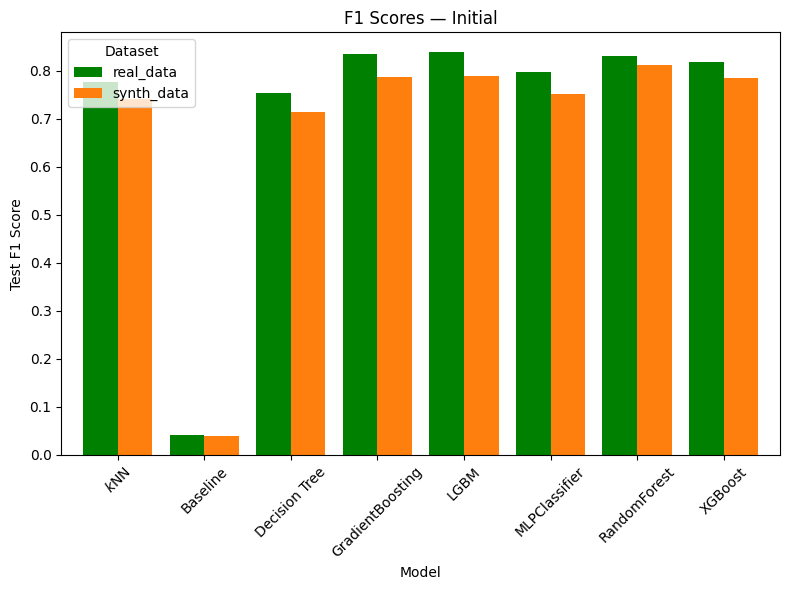

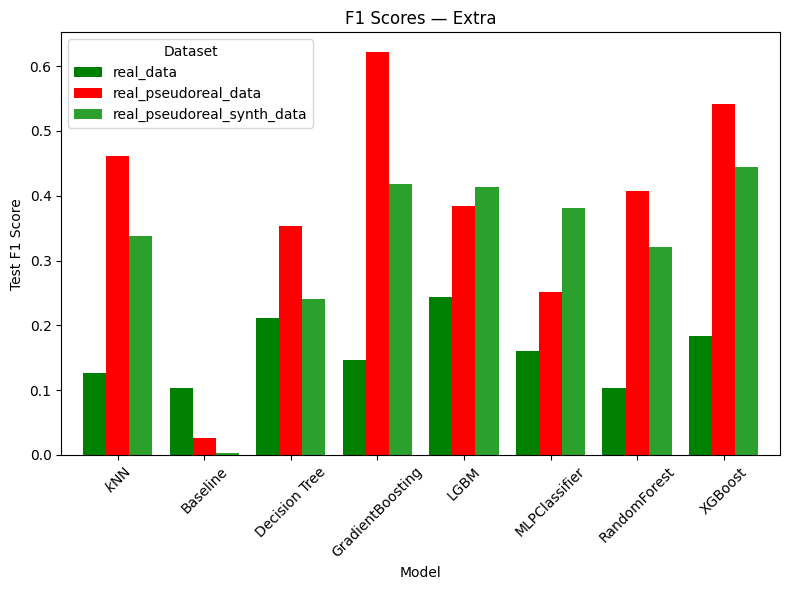

In [75]:

# 1) Flatten into a DataFrame
records = []
for dataset, models in results.items():
    for model, metrics in models.items():
        approach = dataset.split('_')[0]
        dataset_name = "_".join(dataset.split('_')[1:])
        records.append({
            'approach': approach,
            'dataset': dataset_name,
            'model': model,
            'f1': metrics['test_f1']
        })

df = pd.DataFrame.from_records(records)

# 2) Define the explicit color map for known datasets
color_map = {
    'real_data': 'green',
    'real_pseudoreal_data': 'red',
    # add other explicit mappings here…
}

# 3) Plotting helper
def plot_approach(df, approach_name):
    sub = df[df['approach'] == approach_name]
    pivot = sub.pivot(index='model', columns='dataset', values='f1')
    
    # Build a colors list, falling back to the default cycle
    default_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    default_iter = iter(default_cycle)
    colors = [
        color_map.get(ds, next(default_iter))
        for ds in pivot.columns
    ]
    
    ax = pivot.plot(
        kind='bar',
        figsize=(8, 6),
        width=0.8,
        color=colors
    )
    ax.set_title(f'F1 Scores — {approach_name}')
    ax.set_ylabel('Test F1 Score')
    ax.set_xlabel('Model')
    ax.legend(title='Dataset')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4) Draw both charts
plot_approach(df, 'Initial')
plot_approach(df, 'Extra')
